## Project Steps and Objectives:

In [ ]:
# pip install pandas,numpy,matplotlib,seaborn and scikit-learn

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


## 1) Load the Dataset

In [ ]:
# import and load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('marketing_campaign.csv')

data

Campaign_ID              Company Campaign_Type Target_Audience  \
0                1             TechCorp         Email     Women 25-34   
1                2  Innovate Industries    Influencer     Women 35-44   
2                3       NexGen Systems  Social Media     Women 25-34   
3                4  Innovate Industries         Email     Women 25-34   
4                5  Data Tech Solutions    Influencer       Men 25-34   
...            ...                  ...           ...             ...   
22024        22025  Data Tech Solutions        Search       Men 18-24   
22025        22026  Data Tech Solutions  Social Media       Men 18-24   
22026        22027             TechCorp    Influencer     Women 25-34   
22027        22028  Data Tech Solutions        Search       Men 18-24   
22028        22029       NexGen Systems        Search       Men 18-24   

      Duration Channel_Used  Conversion_Rate  Acquisition_Cost     ROI  \
0      30 days     Facebook         5.294194              9344   62.94   
1      45 days   Google Ads         3.326375              8783   10.67   
2      45 days    Instagram         4.056375              9111   73.20   
3      45 days    Instagram         4.496375              7420   60.92   
4      30 days   Google Ads         4.405930              2146  138.82   
...        ...          ...              ...               ...     ...   
22024  30 days      Website         4.379947              4748   -7.01   
22025  45 days   Google Ads         5.889947              5567  -87.96   
22026  30 days     Facebook         4.319947              7154   -9.21   
22027  45 days     Facebook         3.959947              6471   95.18   
22028  30 days    Instagram         5.859947              6089   49.12   

               Location  Language  Clicks  Impressions  Engagement_Score  \
0               Houston   English    3045        67836                 5   
1      Washington, D.C.    German    1944        66361                 4   
2                 Miami   Spanish    3156        86240                 8   
3               Seattle   Spanish    2388        58251                 6   
4               Chicago   English    1025        34407                 5   
...                 ...       ...     ...          ...               ...   
22024          New York   Spanish     883        20848                 8   
22025           Houston  Mandarin     134         2332                 8   
22026           Seattle    German    1299        31078                 9   
22027            Dallas  Mandarin    2526        66129                 8   
22028             Miami    French    1816        31753                 9   

          Customer_Segment        Date  
0         Tech Enthusiasts  01-01-2023  
1                  Foodies  01-01-2023  
2             Fashionistas  01-01-2023  
3                  Foodies  01-01-2023  
4         Tech Enthusiasts  01-01-2023  
...                    ...         ...  
22024         Fashionistas  31-12-2023  
22025  Outdoor Adventurers  31-12-2023  
22026  Outdoor Adventurers  31-12-2023  
22027    Health & Wellness  31-12-2023  
22028  Outdoor Adventurers  31-12-2023  

[22029 rows x 16 columns]

## 2) Descriptive Analysis

In [ ]:
# Basic Structure

# Obtain the number of rows and columns in the dataset
num_rows,num_columns = data.shape
print(f'number of rows {num_rows},number of columns {num_columns}')

# Get a concise summary of the dataset including data types and non-null values
summary = data.info()
print(summary)

# Generate descriptive statistics for numerical columns
descriptive_stats = data.describe()
print(descriptive_stats)


number of rows 22029,number of columns 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dty

In [ ]:
# Data Exploration

# number of unique campaign id values in the dataset
unique_campaign_ids = data['Campaign_ID'].nunique()
print(f'Number of unique Campaign_id values {unique_campaign_ids}')

# list the unique values of the location and customer_segment columns
unique_locations = data['Location'].unique()
unique_customer_segments = data['Customer_Segment'].unique()

print(f'unique values in location column: {unique_locations}')
print(f'unique values in customer_segment column: {unique_customer_segments}')

# Count the occurrences of each category in the Campaign_Type and Channel_Used columns
campaign_type_counts = data['Campaign_Type'].value_counts()
channels_used_counts = data['Channel_Used'].value_counts()

print('occurrences of each category in campaign_type')
print(campaign_type_counts)
print('occurrences of each category in channel_used')
print(channels_used_counts)

Number of unique Campaign_id values 22029
unique values in location column: ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']
unique values in customer_segment column: ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']
occurrences of each category in campaign_type
Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64
occurrences of each category in channel_used
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


## 3) Exploratory Data Analysis (EDA) and Visualization

# Campaign Performance

## Scatter Plot

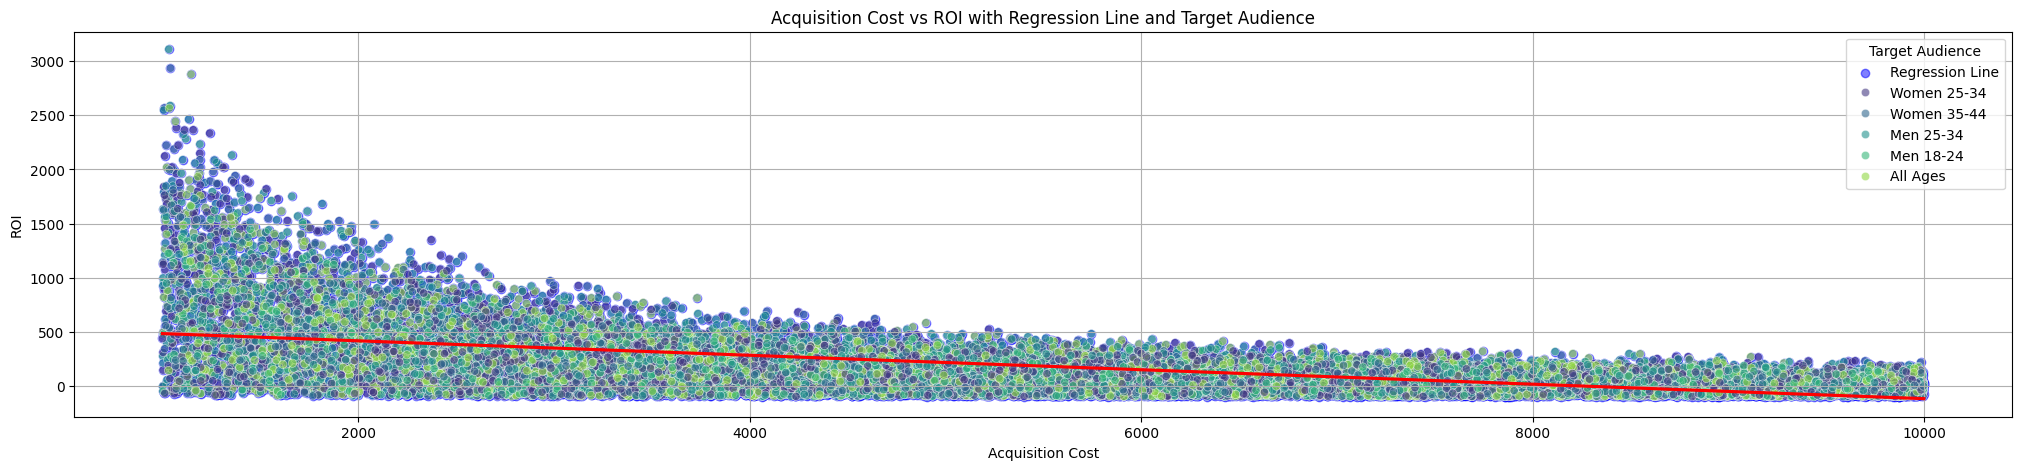

In [ ]:
# Acquisition Cost vs ROI with Regression Line and Target Audience
# figure size
plt.figure(figsize=(25,5))

# Scatter plot with regression line
sns.regplot(data=data,x='Acquisition_Cost',y='ROI',scatter_kws={'alpha': 0.5,'color':'blue'},line_kws={'color':'red'},label='Regression Line')

# Scatter plot colored by Target Audience
sns.scatterplot(data=data,x='Acquisition_Cost',y='ROI',hue='Target_Audience',alpha=0.6,palette='viridis',legend='full')

# Plot display settings
plt.title('Acquisition Cost vs ROI with Regression Line and Target Audience')
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.grid(True)
plt.legend(title='Target Audience')
plt.show()


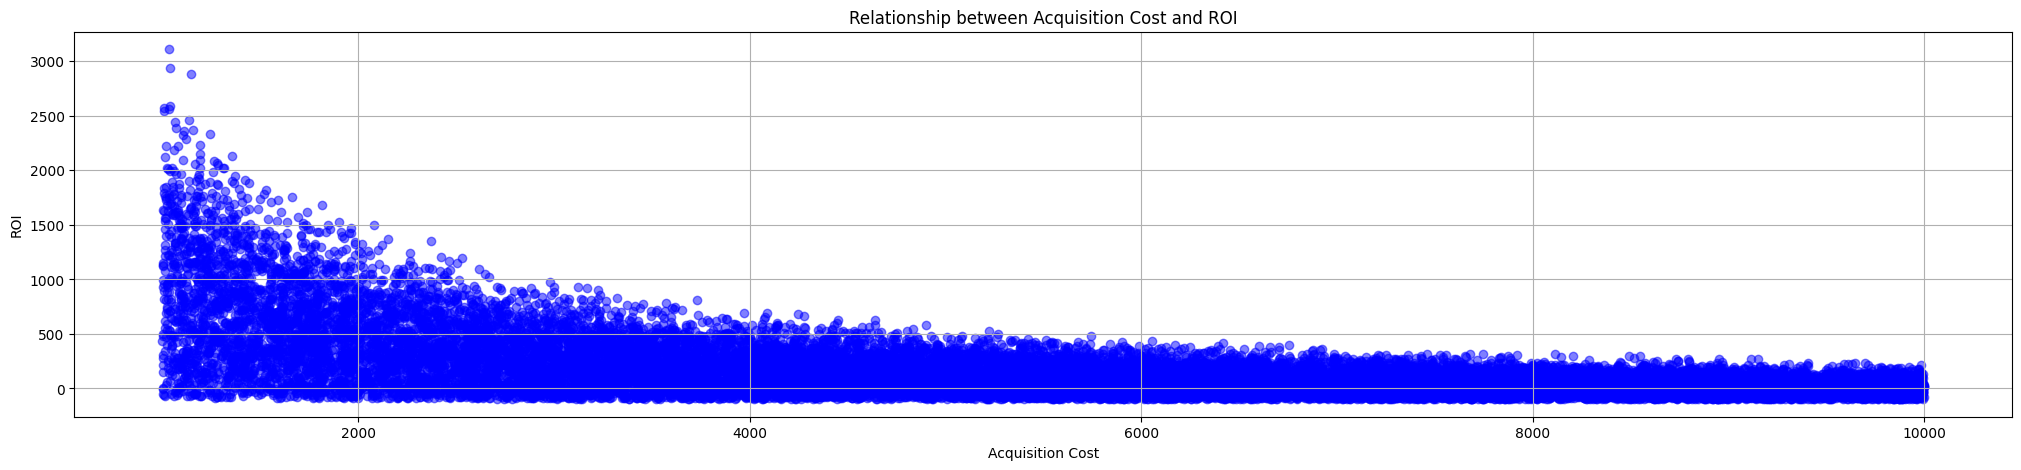

In [ ]:
# Relationship between Acquisition Cost and ROI
plt.figure(figsize=(25,5))
plt.scatter(data['Acquisition_Cost'],data['ROI'],alpha=0.5,color='blue')
plt.title('Relationship between Acquisition Cost and ROI')
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

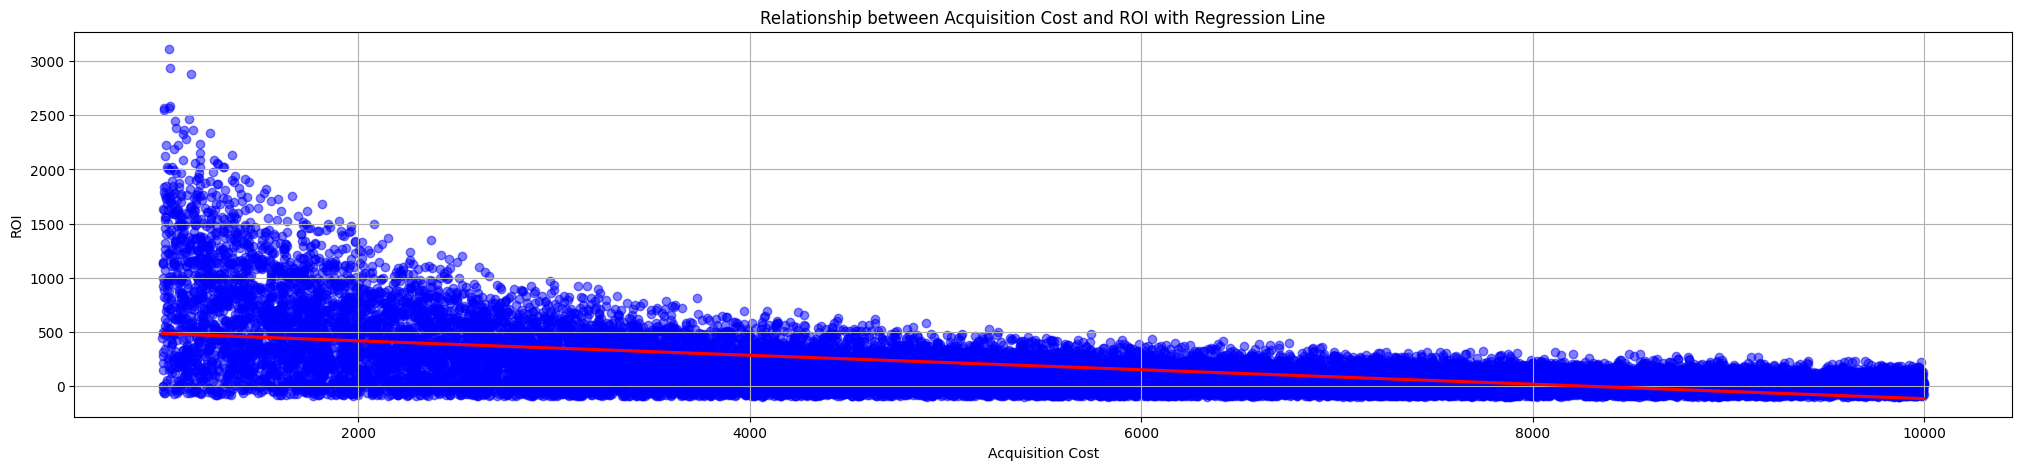

In [ ]:
# Relationship between Acquisition Cost and ROI with Regression Line
plt.figure(figsize=(25,5))
sns.regplot(data=data,x='Acquisition_Cost',y='ROI',scatter_kws={'alpha':0.5,'color':'blue'},line_kws={'color':'red'})
plt.title('Relationship between Acquisition Cost and ROI with Regression Line')
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

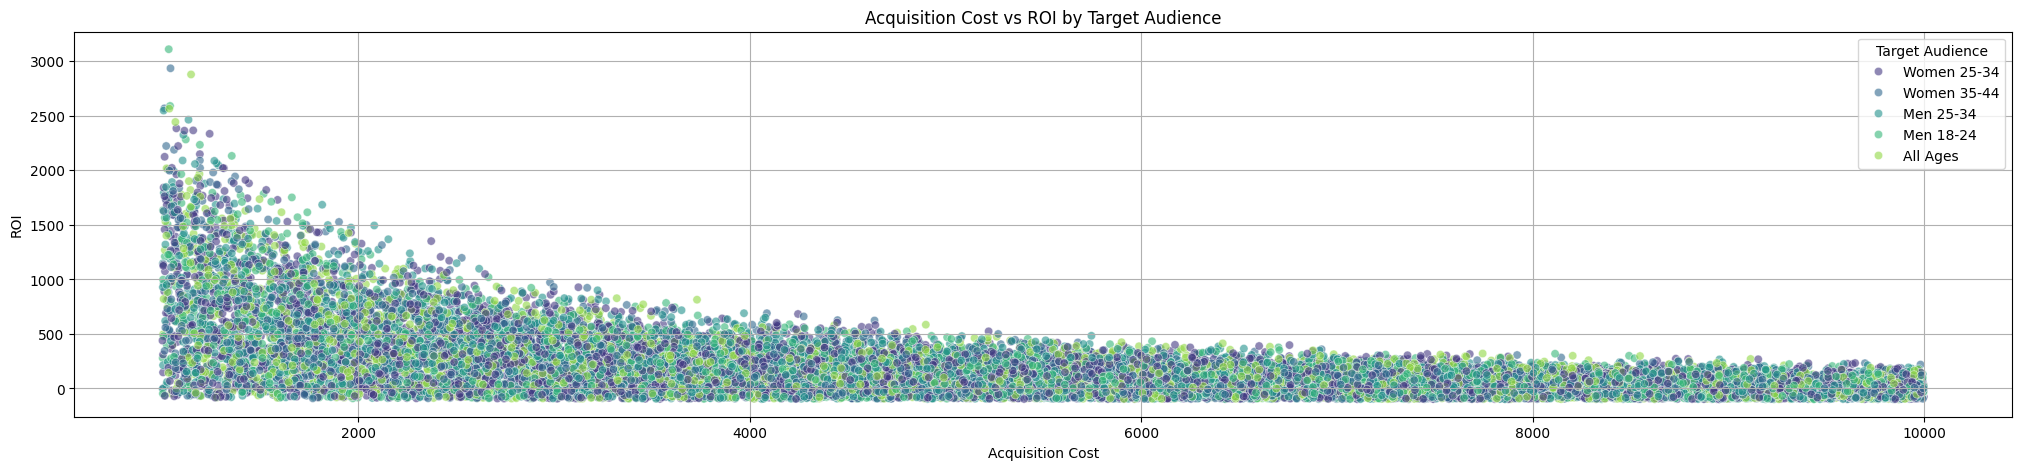

In [ ]:
# Acquisition Cost vs ROI colored by Target Audience
plt.figure(figsize=(25,5))
sns.scatterplot(data=data,x='Acquisition_Cost',y='ROI',hue='Target_Audience',alpha=0.6,palette='viridis')
plt.title('Acquisition Cost vs ROI by Target Audience')
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.grid(True)
plt.legend(title='Target Audience')
plt.show()

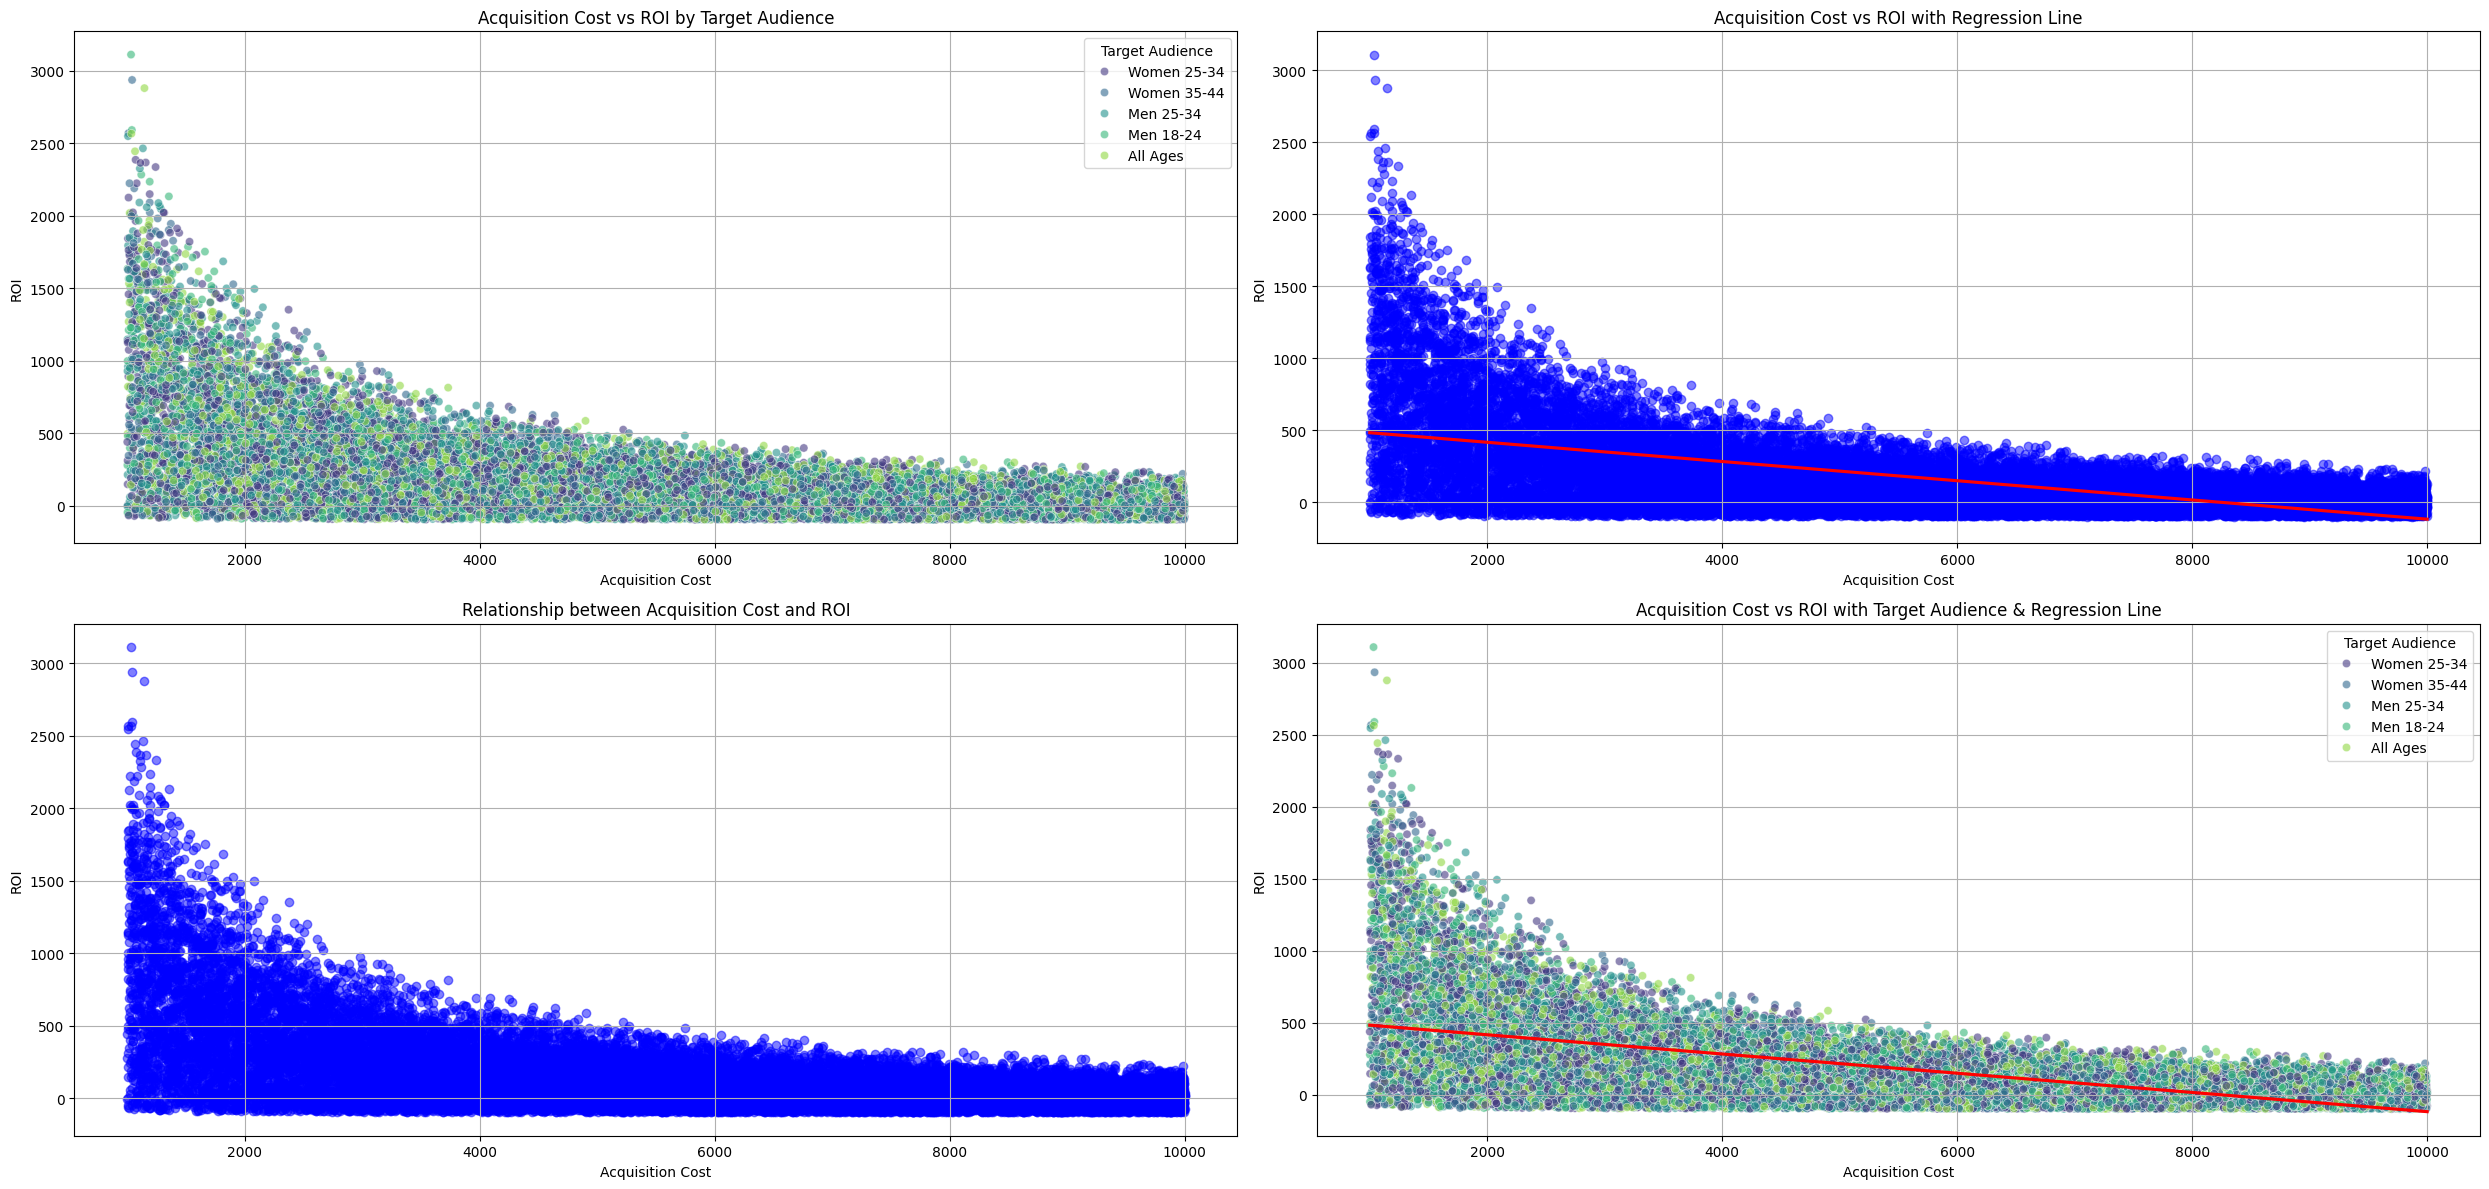

In [ ]:
# create a grid of plots (2*2) scatter plot
fig,axs = plt.subplots(2,2,figsize=(25,12))

# Acquisition Cost vs ROI colored by Target Audience
sns.scatterplot(data=data,x='Acquisition_Cost',y='ROI',hue='Target_Audience',alpha=0.6,palette='viridis',ax=axs[0,0])
axs[0,0].set_title('Acquisition Cost vs ROI by Target Audience')
axs[0,0].set_xlabel('Acquisition Cost')
axs[0,0].set_ylabel('ROI')
axs[0,0].grid(True)
axs[0,0].legend(title='Target Audience')

# Acquisition Cost vs ROI with Regression Line
sns.regplot(data=data,x='Acquisition_Cost',y='ROI',scatter=True,scatter_kws={'alpha':0.5,'color':'blue'},line_kws={'color':'red'},ax=axs[0,1])
axs[0,1].set_title('Acquisition Cost vs ROI with Regression Line')
axs[0,1].set_xlabel('Acquisition Cost')
axs[0,1].set_ylabel('ROI')
axs[0,1].grid(True)

# Relationship between Acquisition Cost and ROI
axs[1,0].scatter(data['Acquisition_Cost'],data['ROI'],alpha=0.5,color='blue')
axs[1,0].set_title('Relationship between Acquisition Cost and ROI')
axs[1,0].set_xlabel('Acquisition Cost')
axs[1,0].set_ylabel('ROI')
axs[1,0].grid(True)

# Acquisition Cost vs ROI with Target Audience & Regression Line
sns.scatterplot(data=data, x='Acquisition_Cost', y='ROI',hue='Target_Audience',alpha=0.6,palette='viridis',ax=axs[1,1])
sns.regplot(data=data, x='Acquisition_Cost',y='ROI',scatter=False,line_kws={'color':'red'},ax=axs[1,1])
axs[1,1].set_title('Acquisition Cost vs ROI with Target Audience & Regression Line')
axs[1,1].set_xlabel('Acquisition Cost')
axs[1,1].set_ylabel('ROI')
axs[1,1].grid(True)
axs[1,1].legend(title='Target Audience')

plt.tight_layout()
plt.show()

## Bar Chart

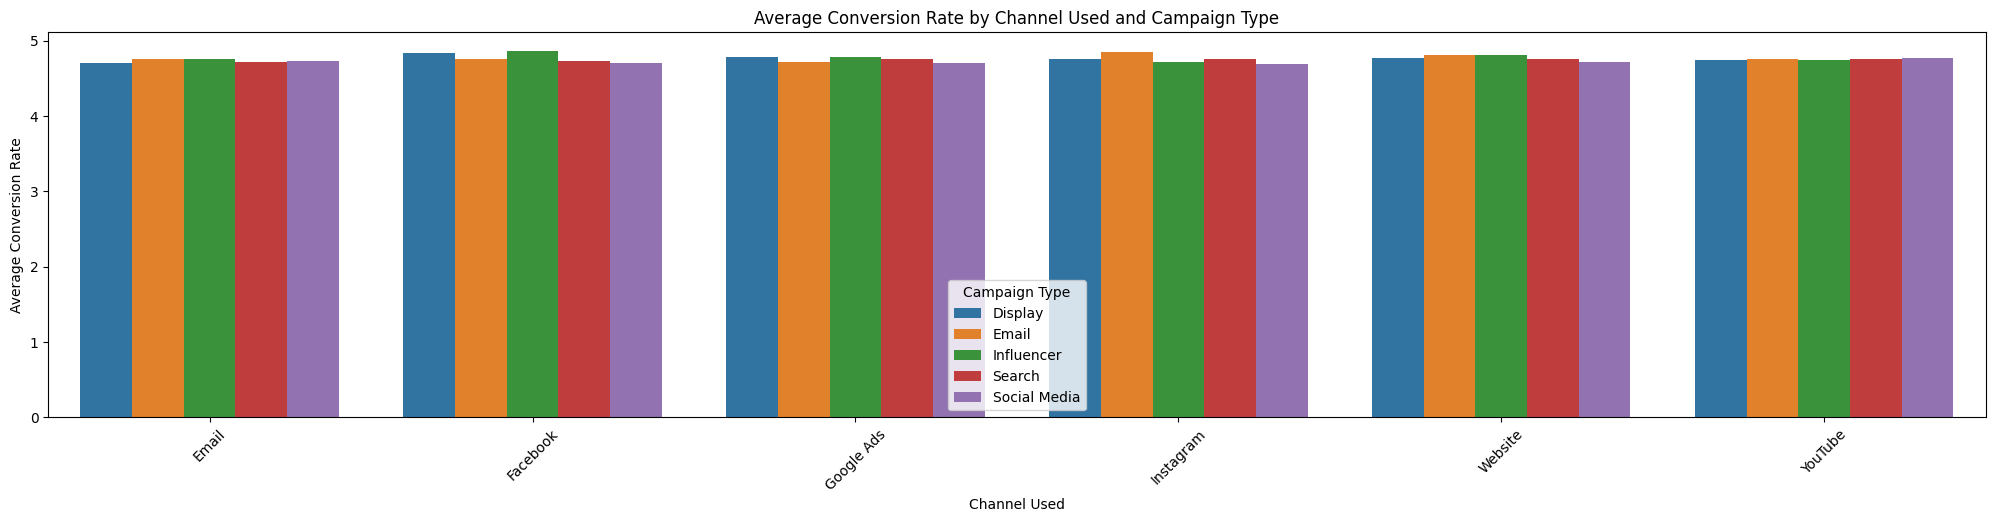

In [ ]:
# Average Conversion Rate for different Channel_Used categorized by Campaign_Type
average_conversion_rate = data.groupby(['Channel_Used','Campaign_Type'])['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(25,5))
sns.barplot(data=average_conversion_rate,x='Channel_Used',y='Conversion_Rate',hue='Campaign_Type',ci=None)
plt.title('Average Conversion Rate by Channel Used and Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()

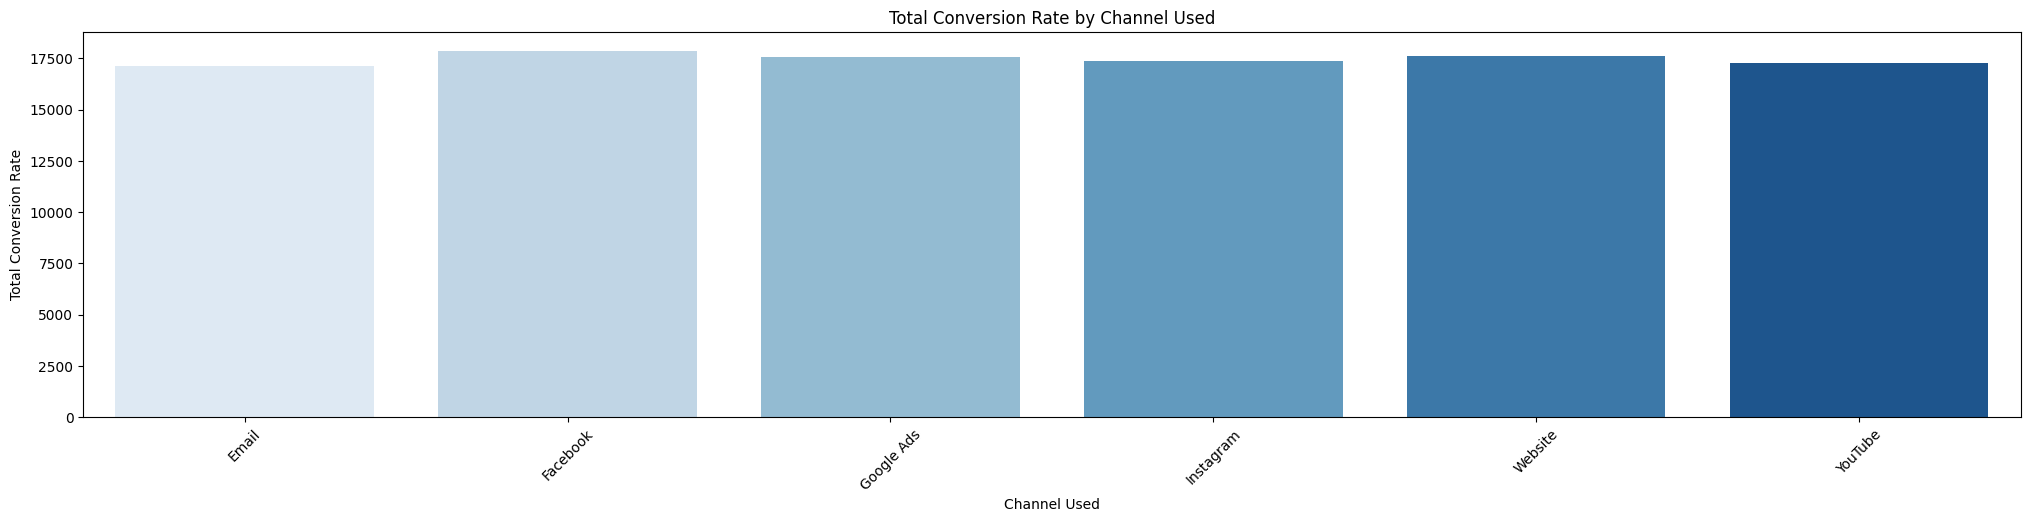

In [ ]:
# Total Conversion Rate by Channel Used
total_conversion_rate = data.groupby('Channel_Used')['Conversion_Rate'].sum().reset_index()

plt.figure(figsize=(25,5))
sns.barplot(data=total_conversion_rate,x='Channel_Used',y='Conversion_Rate',palette='Blues',ci=None)
plt.title('Total Conversion Rate by Channel Used')
plt.xlabel('Channel Used')
plt.ylabel('Total Conversion Rate')
plt.xticks(rotation=45)
plt.show()

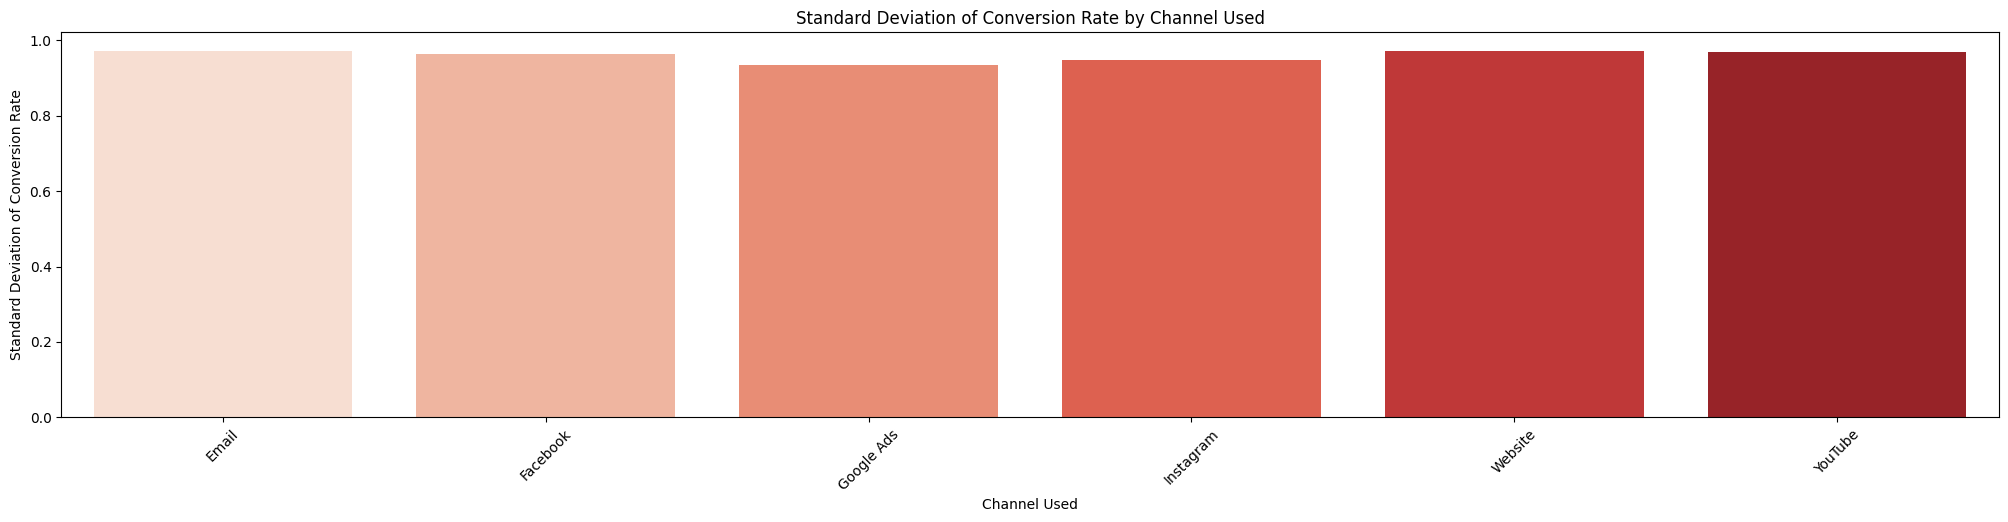

In [ ]:
# Standard Deviation of Conversion Rates by Channel Used
std_conversion_rate = data.groupby('Channel_Used')['Conversion_Rate'].std().reset_index()

plt.figure(figsize=(25,5))
sns.barplot(data=std_conversion_rate,x='Channel_Used',y='Conversion_Rate',palette='Reds',ci=None)
plt.title('Standard Deviation of Conversion Rate by Channel Used')
plt.xlabel('Channel Used')
plt.ylabel('Standard Deviation of Conversion Rate')
plt.xticks(rotation=45)
plt.show()

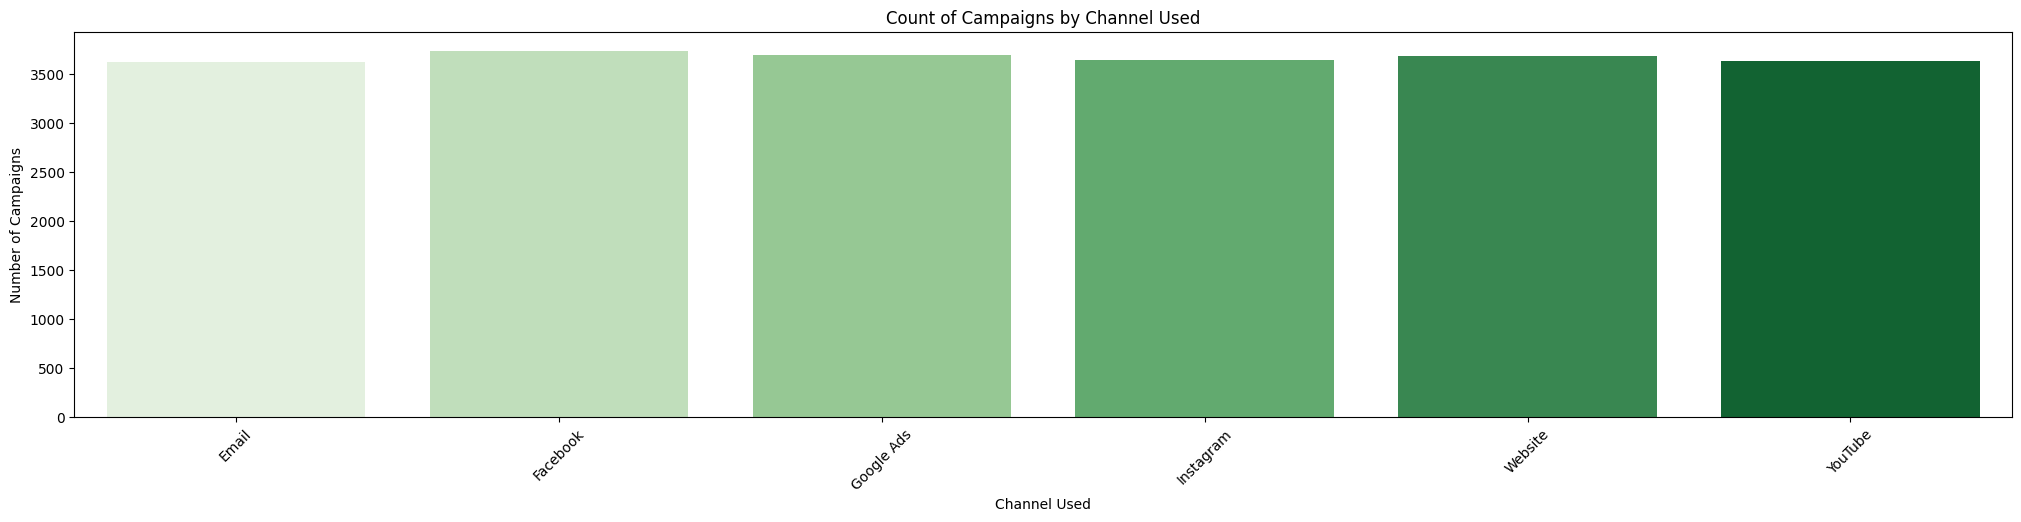

In [ ]:
# Count of Campaigns per Channel Used
campaign_count = data.groupby('Channel_Used')['Campaign_Type'].count().reset_index()

plt.figure(figsize=(25,5))
sns.barplot(data=campaign_count,x='Channel_Used',y='Campaign_Type',palette='Greens',ci=None)
plt.title('Count of Campaigns by Channel Used')
plt.xlabel('Channel Used')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.show()

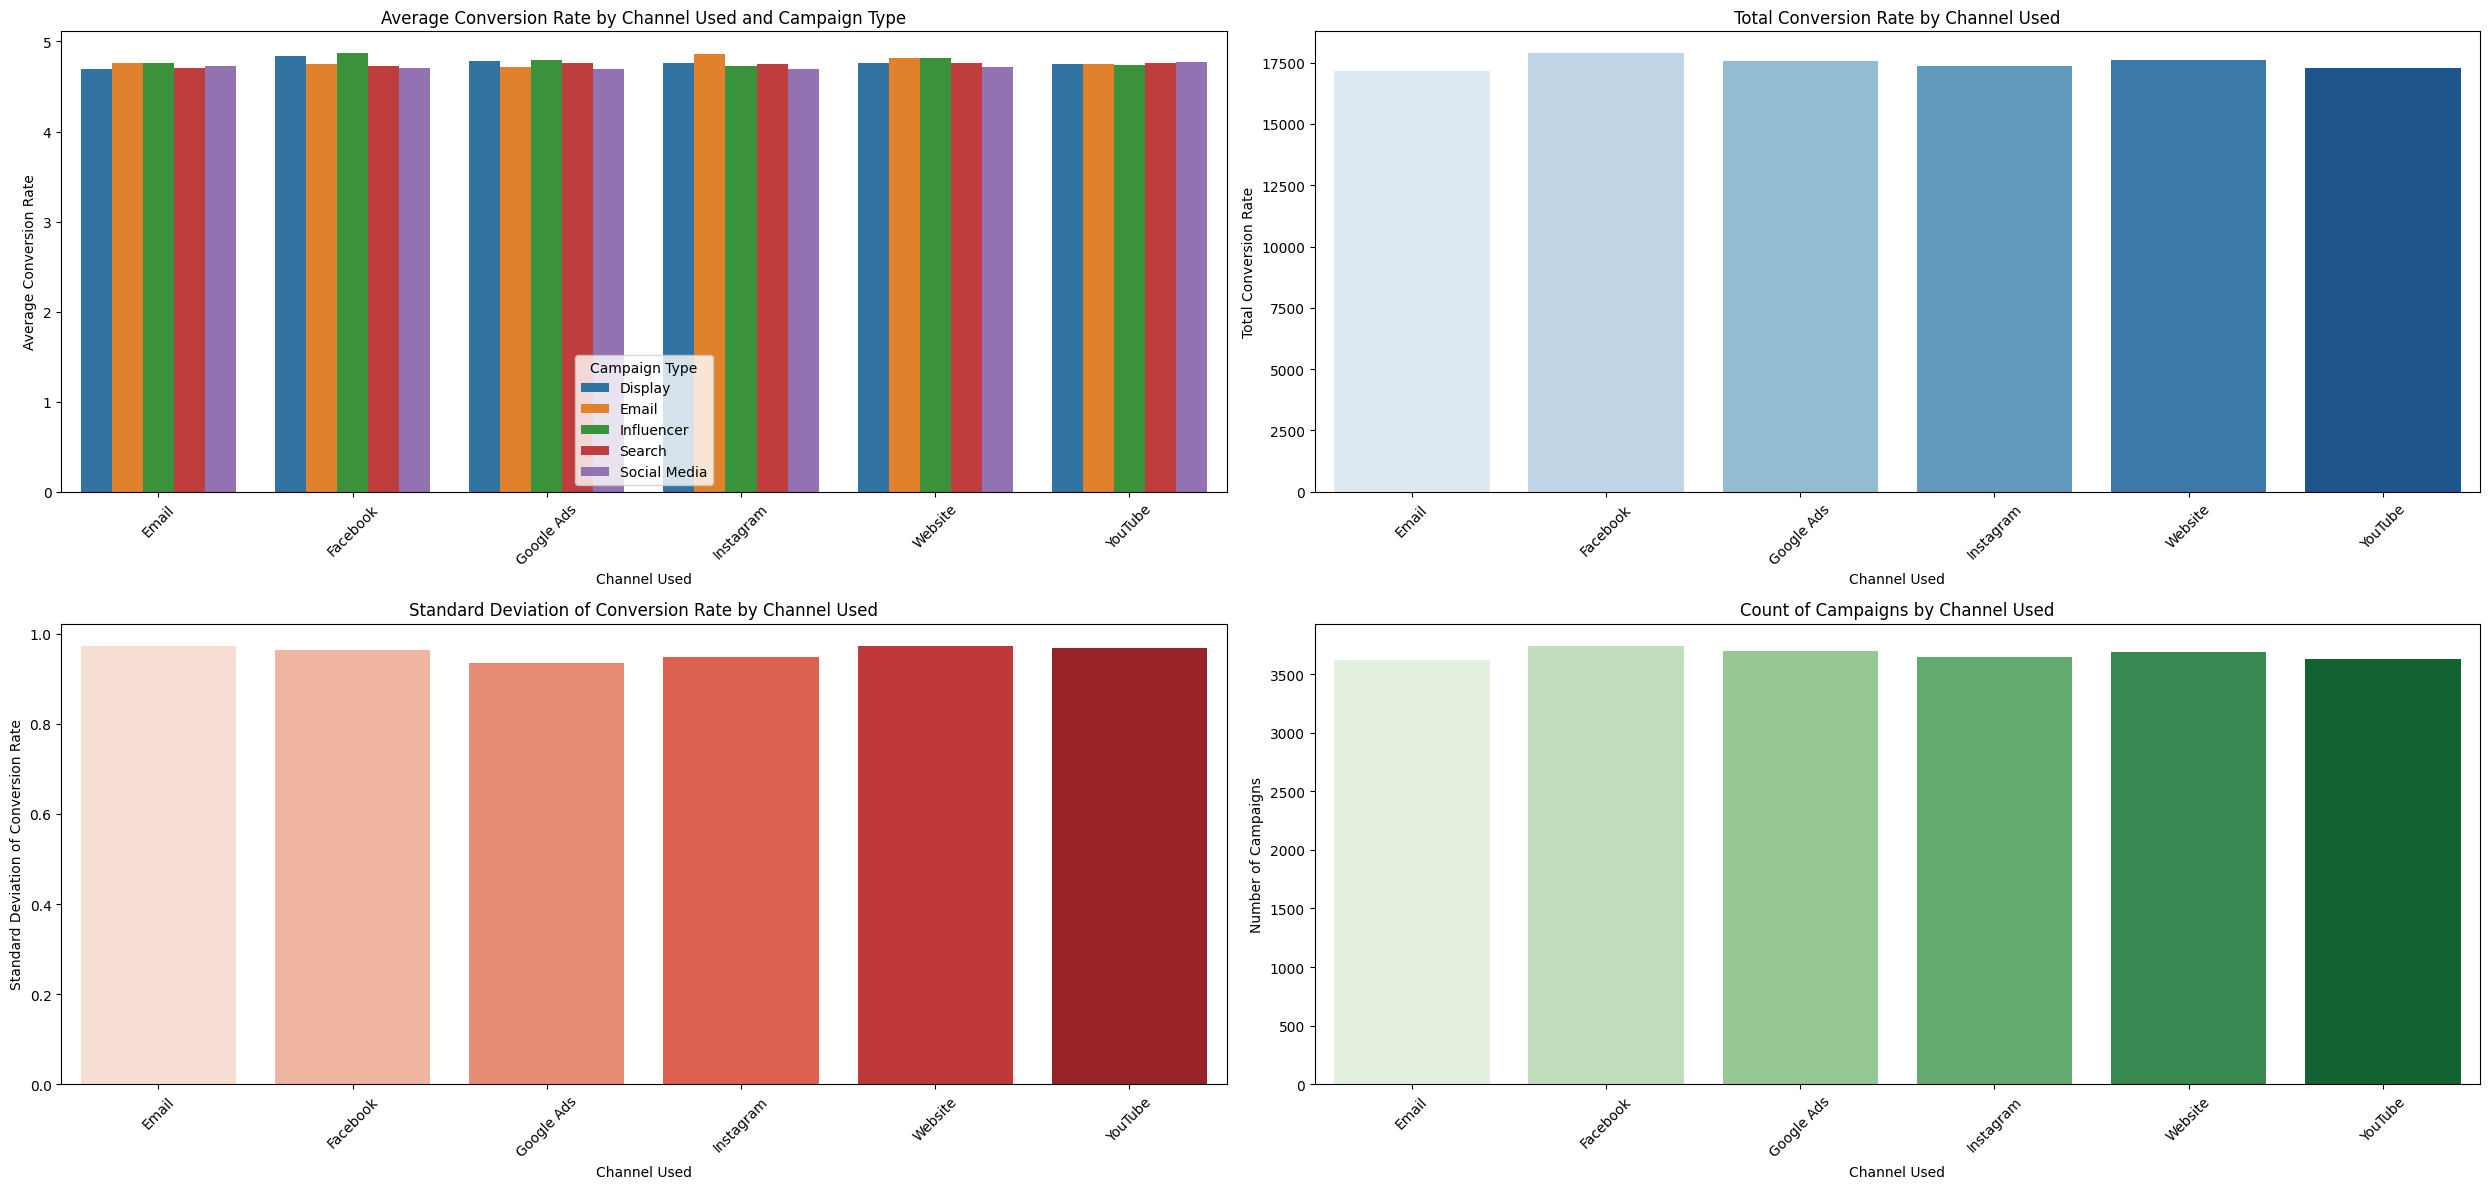

In [ ]:

# Prepare the data Bar chart grouping
average_conversion_rate = data.groupby(['Channel_Used','Campaign_Type'])['Conversion_Rate'].mean().reset_index()
total_conversion_rate = data.groupby('Channel_Used')['Conversion_Rate'].sum().reset_index()
std_conversion_rate = data.groupby('Channel_Used')['Conversion_Rate'].std().reset_index()
campaign_count = data.groupby('Channel_Used')['Campaign_Type'].count().reset_index()

# figure size
fig,axs = plt.subplots(2,2,figsize=(25,12))

# Average Conversion Rate by Channel Used and Campaign Type
sns.barplot(data=average_conversion_rate,x='Channel_Used',y='Conversion_Rate',hue='Campaign_Type',ci=None,ax=axs[0,0])
axs[0,0].set_title('Average Conversion Rate by Channel Used and Campaign Type')
axs[0,0].set_xlabel('Channel Used')
axs[0,0].set_ylabel('Average Conversion Rate')
axs[0,0].tick_params(axis='x',rotation=45)
axs[0,0].legend(title='Campaign Type')

# Total Conversion Rate by Channel Used
sns.barplot(data=total_conversion_rate,x='Channel_Used',y='Conversion_Rate',palette='Blues',ci=None,ax=axs[0,1])
axs[0,1].set_title('Total Conversion Rate by Channel Used')
axs[0,1].set_xlabel('Channel Used')
axs[0,1].set_ylabel('Total Conversion Rate')
axs[0,1].tick_params(axis='x',rotation=45)

# Standard Deviation of Conversion Rate by Channel Used
sns.barplot(data=std_conversion_rate,x='Channel_Used',y='Conversion_Rate',palette='Reds',ci=None,ax=axs[1,0])
axs[1,0].set_title('Standard Deviation of Conversion Rate by Channel Used')
axs[1,0].set_xlabel('Channel Used')
axs[1,0].set_ylabel('Standard Deviation of Conversion Rate')
axs[1,0].tick_params(axis='x',rotation=45)

# Count of Campaigns per Channel Used
sns.barplot(data=campaign_count,x='Channel_Used',y='Campaign_Type',palette='Greens',ci=None,ax=axs[1,1])
axs[1,1].set_title('Count of Campaigns by Channel Used')
axs[1,1].set_xlabel('Channel Used')
axs[1,1].set_ylabel('Number of Campaigns')
axs[1,1].tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
roi_summary = data.groupby('ROI_Category')['Acquisition_Cost'].agg(['mean','median','std','count']).reset_index()
print(roi_summary)

  ROI_Category         mean  median          std  count
0     Negative  6754.639078  7091.0  2246.039352   5727
1          Low  7079.625000  7535.5  2407.010426     64
2       Medium  6060.633333  6080.5  2385.692416     60
3         High  5078.495859  4856.0  2571.821149  16178


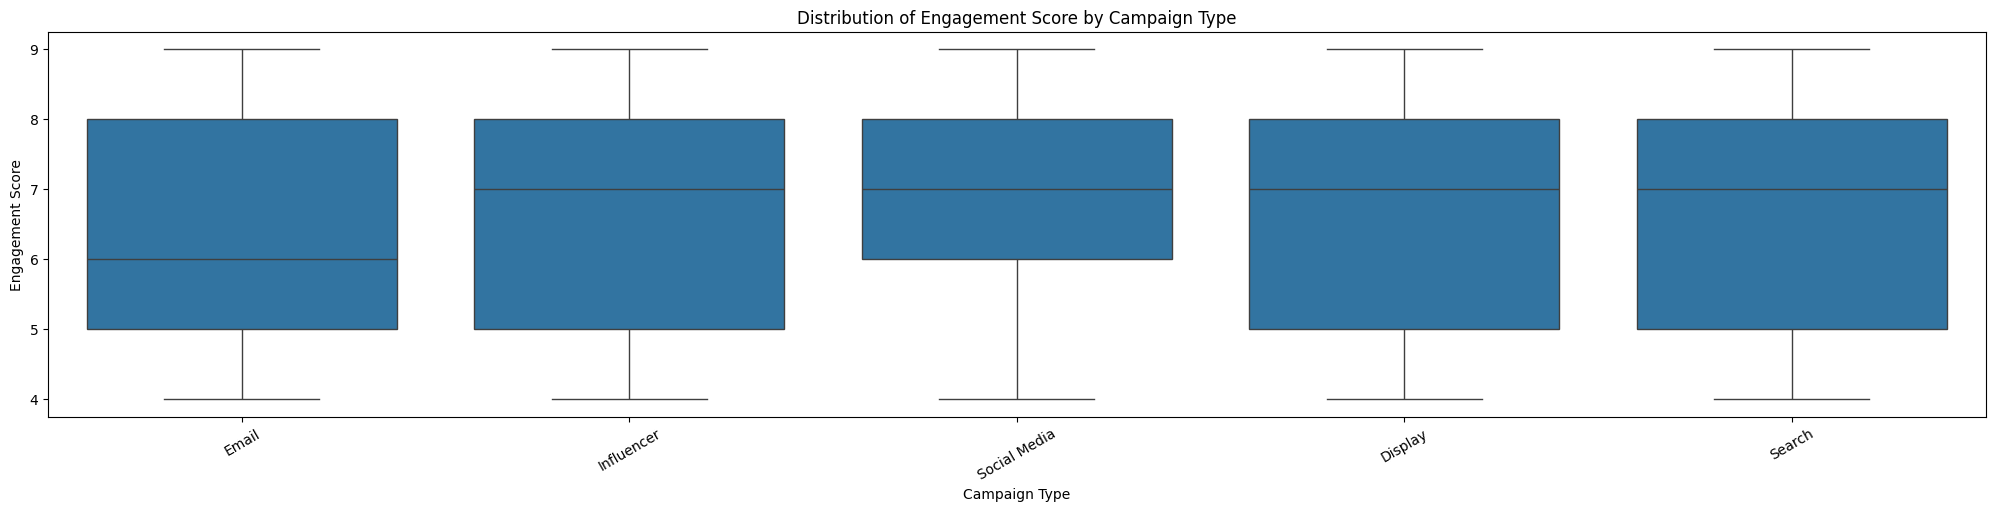

In [ ]:
# Box Plot: Distribution of Engagement_Score across Campaign_Type
plt.figure(figsize=(25,5))
sns.boxplot(data=data,x='Campaign_Type',y='Engagement_Score')
plt.title('Distribution of Engagement Score by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Engagement Score')
plt.xticks(rotation=30)
plt.show()

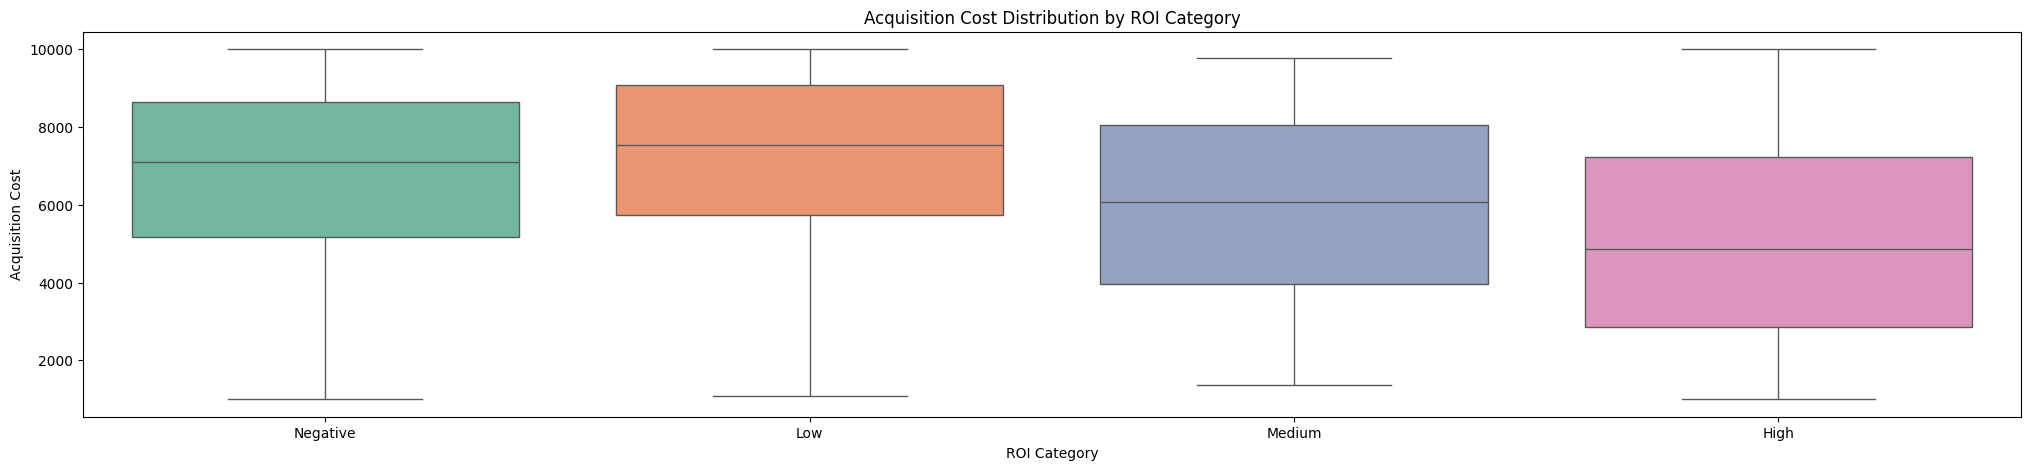

In [ ]:
# Creating ROI Categories for Box Plot
data['ROI_Category'] = pd.cut(data['ROI'],bins=[-float('inf'),0,1,2,float('inf')],labels=['Negative','Low','Medium','High'])

plt.figure(figsize=(25,5))
sns.boxplot(data=data,x='ROI_Category',y='Acquisition_Cost',palette='Set2')
plt.title('Acquisition Cost Distribution by ROI Category')
plt.xlabel('ROI Category')
plt.ylabel('Acquisition Cost')
plt.show()

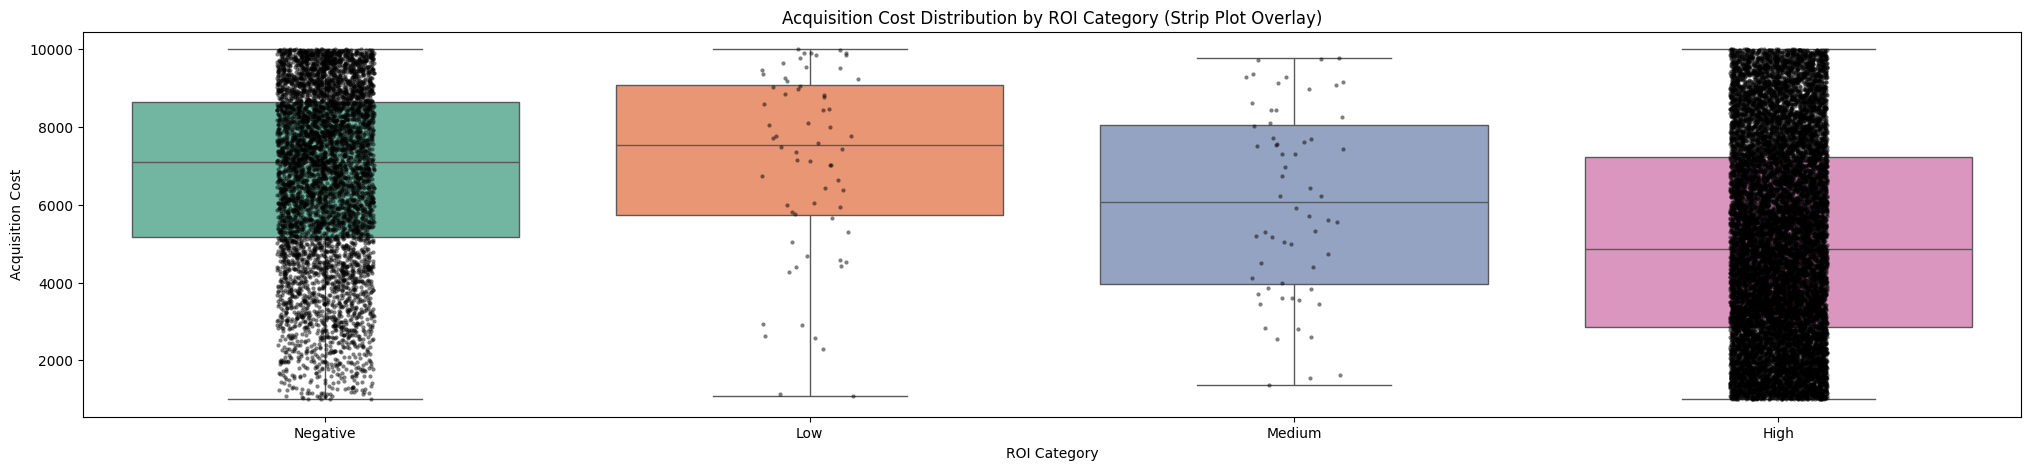

In [ ]:
# Acquisition Cost Distribution by ROI Category (Strip Plot Overlay)
plt.figure(figsize=(25,5))
sns.boxplot(data=data,x='ROI_Category',y='Acquisition_Cost',palette='Set2',fliersize=0)
sns.stripplot(data=data,x='ROI_Category',y='Acquisition_Cost',color='black',alpha=0.5,size=3)
plt.title('Acquisition Cost Distribution by ROI Category (Strip Plot Overlay)')
plt.xlabel('ROI Category')
plt.ylabel('Acquisition Cost')
plt.show()

In [ ]:
# Acquisition Cost Distribution by ROI Category (Swarm Plot Overlay)
plt.figure(figsize=(25,5))
sns.boxplot(data=data,x='ROI_Category',y='Acquisition_Cost',palette='Set2',fliersize=0)
sns.swarmplot(data=data,x='ROI_Category',y='Acquisition_Cost',color='black',alpha=0.6)
plt.title('Acquisition Cost Distribution by ROI Category (Swarm Plot Overlay)')
plt.xlabel('ROI Category')
plt.ylabel('Acquisition Cost')
plt.show()

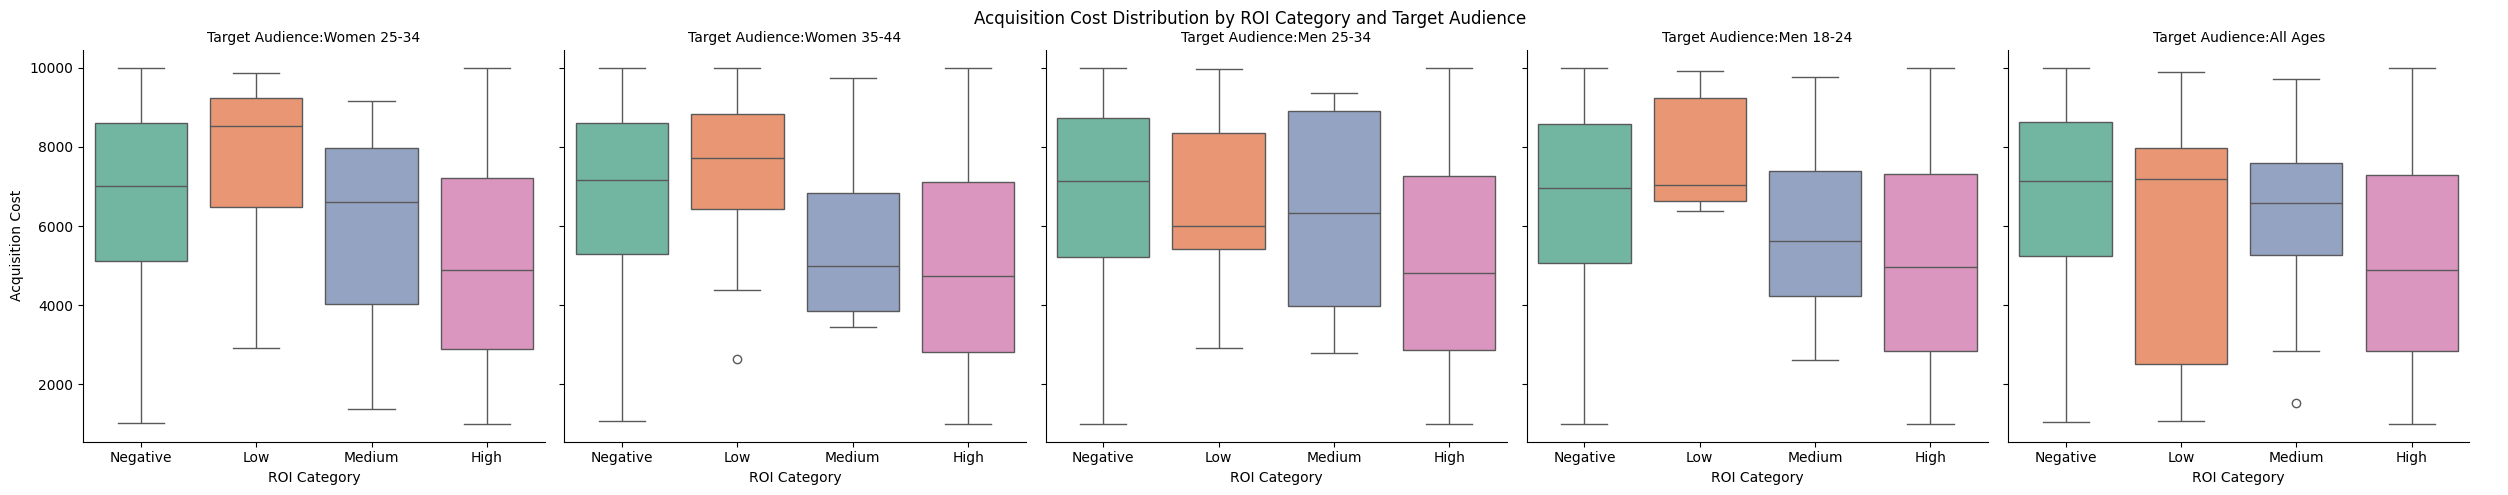

In [ ]:
# Acquisition Cost Distribution by ROI Category and Target Audience')
g = sns.FacetGrid(data,col='Target_Audience',height=5,aspect=1)
g.map(sns.boxplot,'ROI_Category','Acquisition_Cost',palette='Set2')
g.add_legend()
g.set_axis_labels('ROI Category','Acquisition Cost')
g.set_titles(col_template='Target Audience:{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Acquisition Cost Distribution by ROI Category and Target Audience')
plt.show()

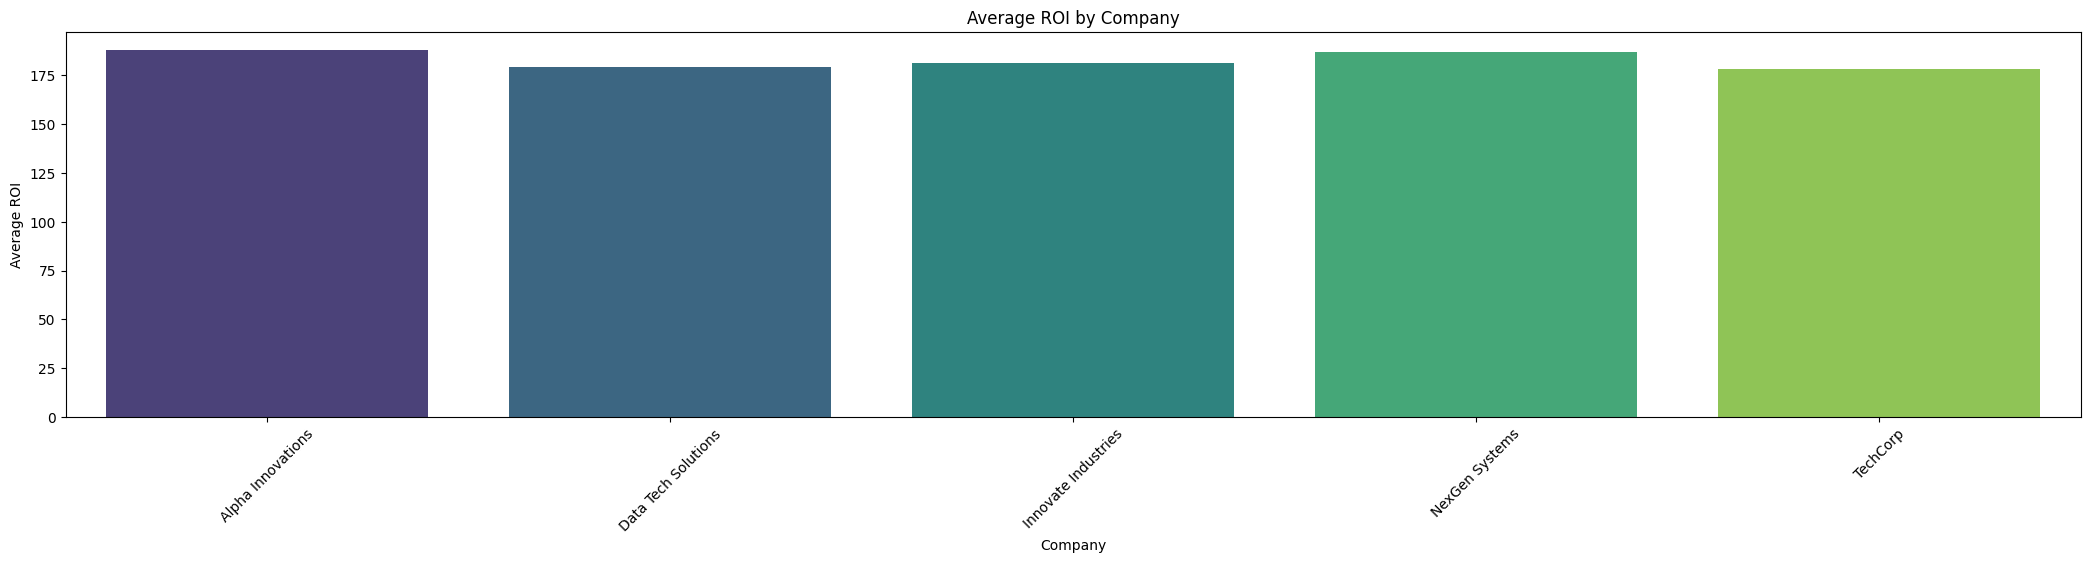

In [ ]:
# Bar Chart: Average ROI by Company
average_roi_by_company = data.groupby('Company')['ROI'].mean().reset_index()

plt.figure(figsize=(26,5))
sns.barplot(data=average_roi_by_company,x='Company',y='ROI',palette='viridis')
plt.title('Average ROI by Company')
plt.xlabel('Company')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()

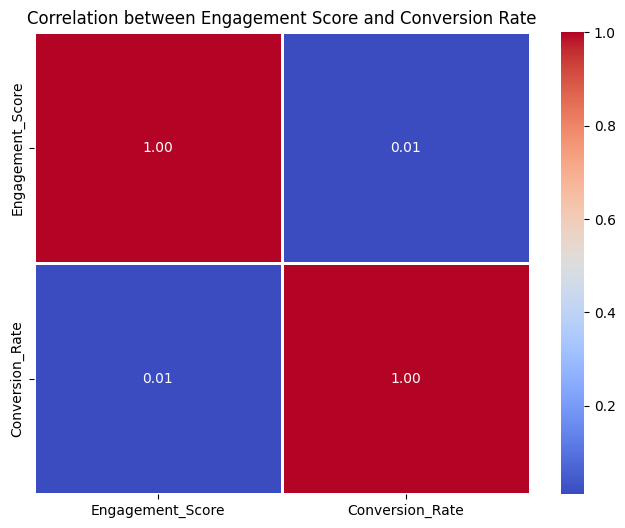

In [ ]:
# Heatmap: Correlation between Engagement Score and Conversion Rate
correlation_matrix = data[['Engagement_Score','Conversion_Rate']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=1)
plt.title('Correlation between Engagement Score and Conversion Rate')
plt.show()


# Customer Segmentation

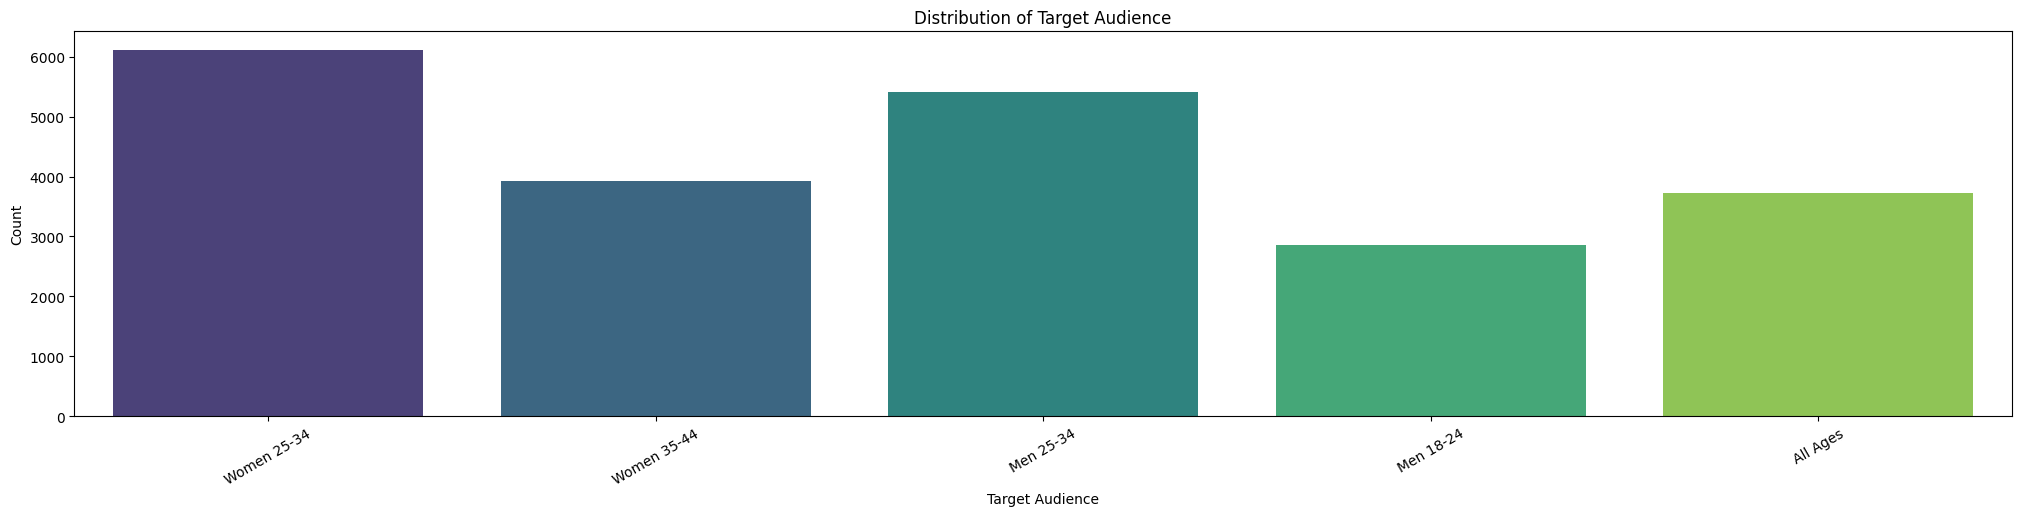

In [ ]:
# Count Plot: Distribution of Target_Audience
plt.figure(figsize=(25,5))
sns.countplot(data=data,x='Target_Audience',palette='viridis')
plt.title('Distribution of Target Audience')
plt.xlabel('Target Audience')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

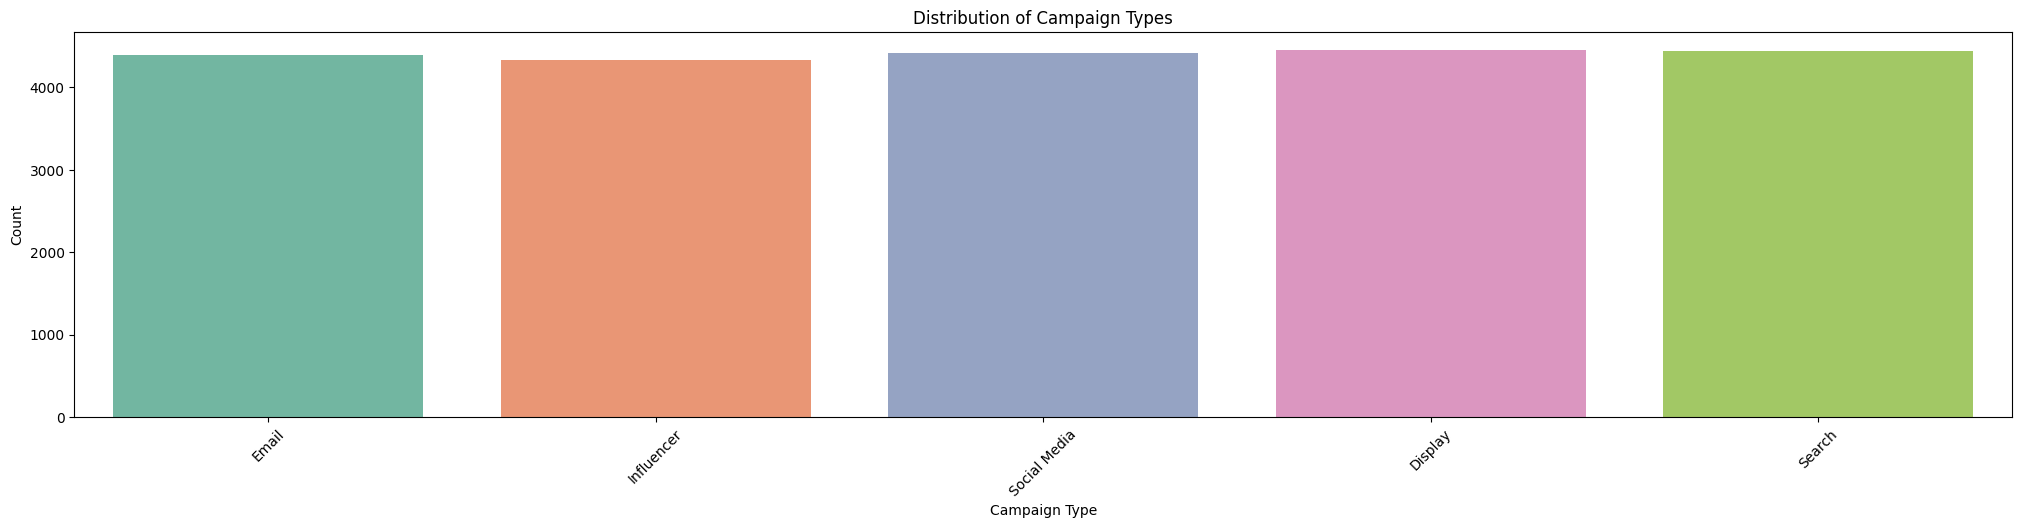

In [ ]:

plt.figure(figsize=(25,5))
sns.countplot(data=data,x='Campaign_Type',palette='Set2')
plt.title('Distribution of Campaign Types')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

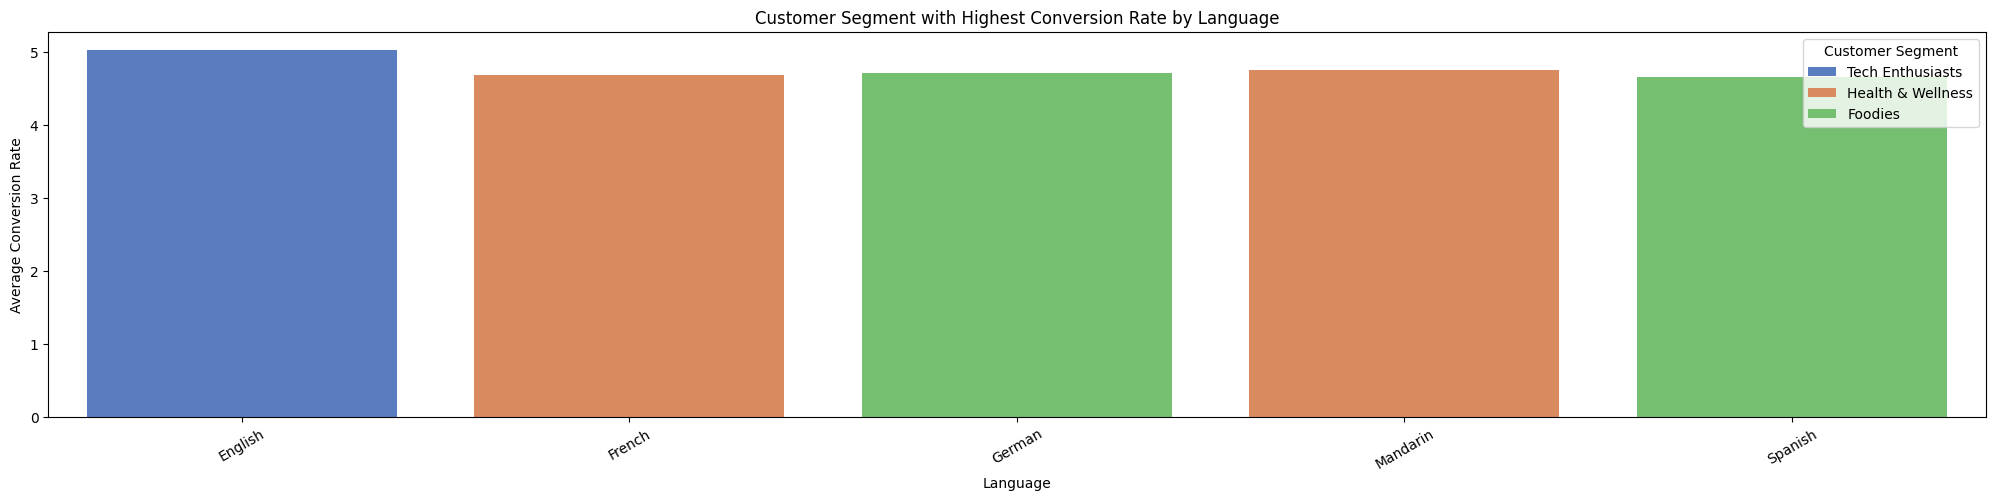

In [ ]:
# Bar Chart: Customer_Segment with highest Conversion Rate for each Language
highest_conversion_rate = data.groupby(['Language','Customer_Segment'])['Conversion_Rate'].mean().reset_index()
best_conversion_segments = highest_conversion_rate.loc[highest_conversion_rate.groupby('Language')['Conversion_Rate'].idxmax()]

plt.figure(figsize=(25,5))
sns.barplot(data=best_conversion_segments,x='Language',y='Conversion_Rate',hue='Customer_Segment',palette='muted')
plt.title('Customer Segment with Highest Conversion Rate by Language')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.legend(title='Customer Segment')
plt.xticks(rotation=30)
plt.show()

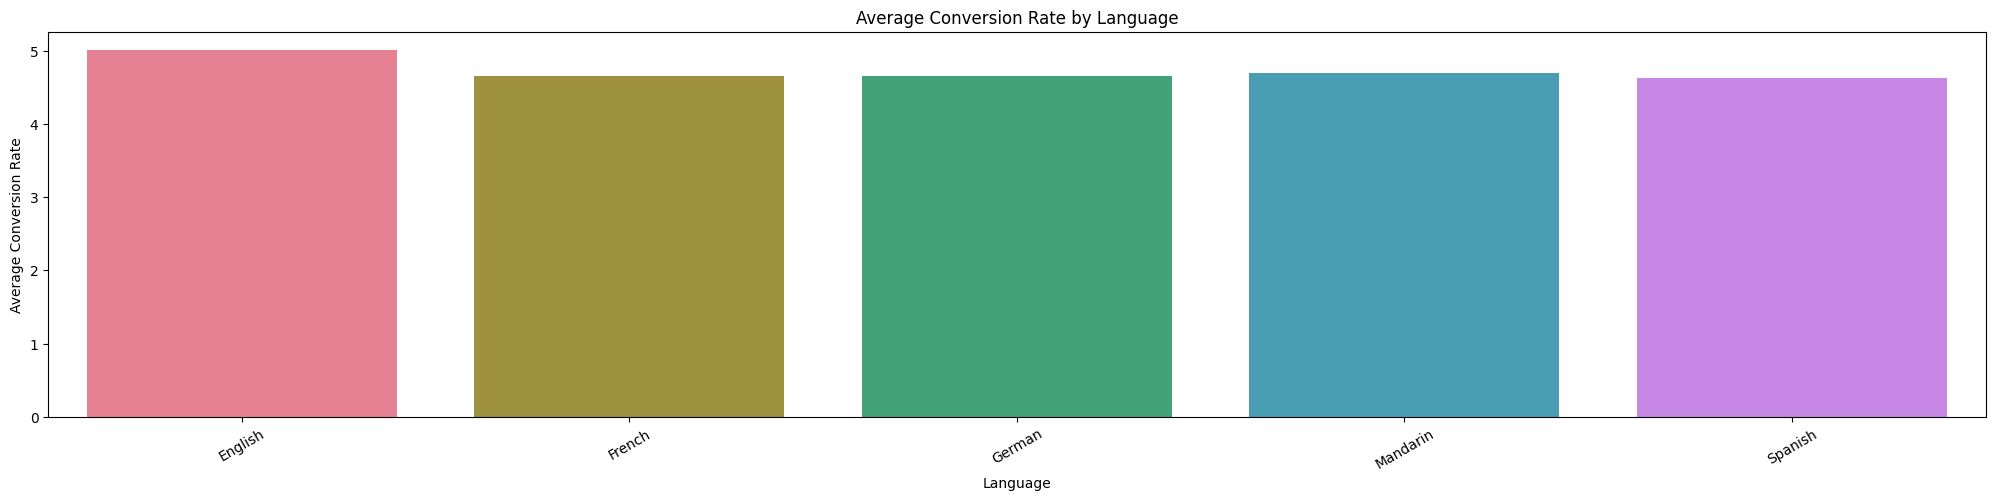

In [ ]:
# Bar Chart: Average Conversion Rate by Language
average_conversion_rate_by_language = data.groupby('Language')['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(25,5))
sns.barplot(data=average_conversion_rate_by_language,x='Language',y='Conversion_Rate',palette='husl')
plt.title('Average Conversion Rate by Language')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=30)
plt.show()

# Channel Effectiveness

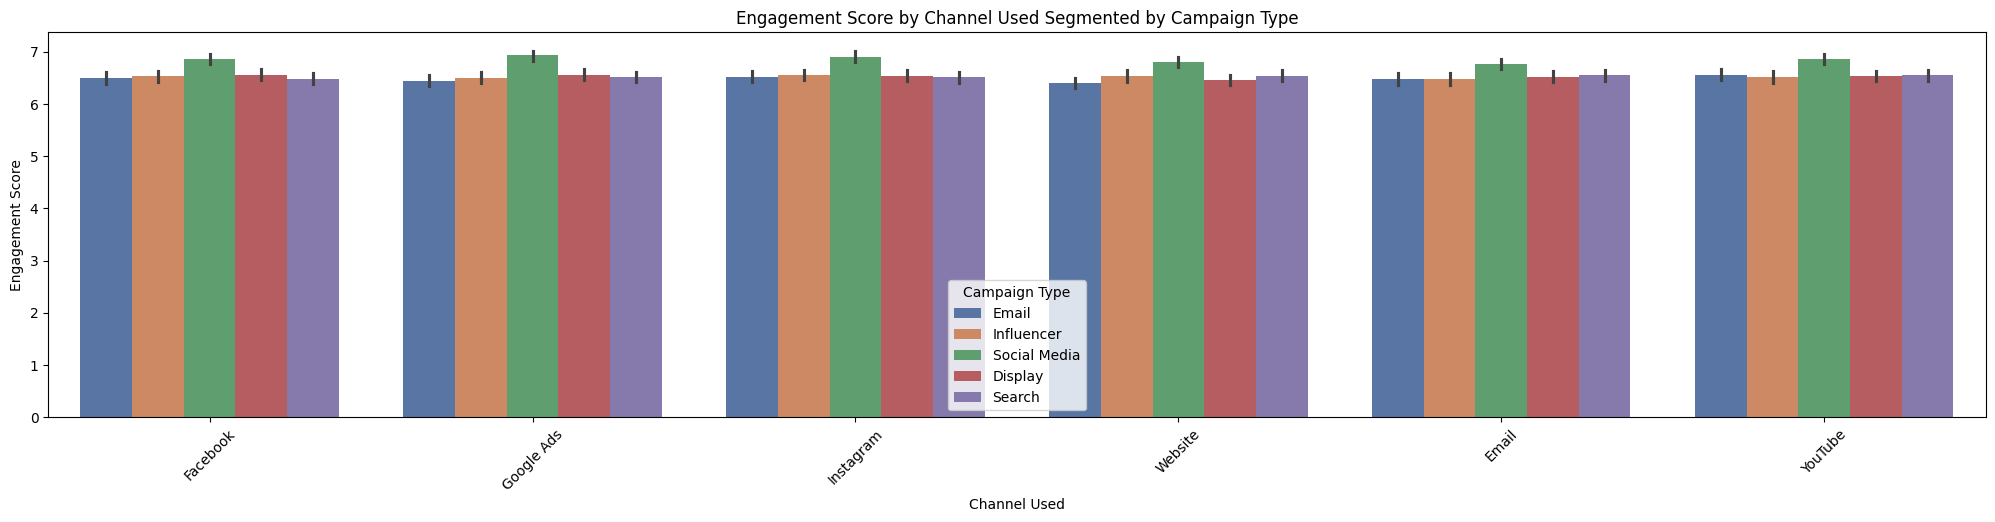

In [ ]:
# Bar Chart: Engagement Score for different Channels Used segmented by Campaign Type
plt.figure(figsize=(25,5))
sns.barplot(data=data,x='Channel_Used',y='Engagement_Score',hue='Campaign_Type',palette='deep')
plt.title('Engagement Score by Channel Used Segmented by Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()

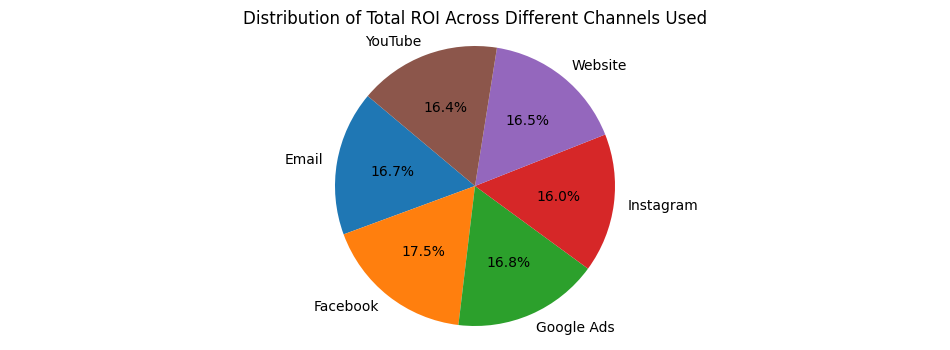

In [ ]:
# Pie Chart: Distribution of Total ROI across different Channels Used
total_roi_by_channel = data.groupby('Channel_Used')['ROI'].sum().reset_index()

plt.figure(figsize=(12,4))
plt.pie(total_roi_by_channel['ROI'],labels=total_roi_by_channel['Channel_Used'],autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Total ROI Across Different Channels Used')
plt.axis('equal')
plt.show()

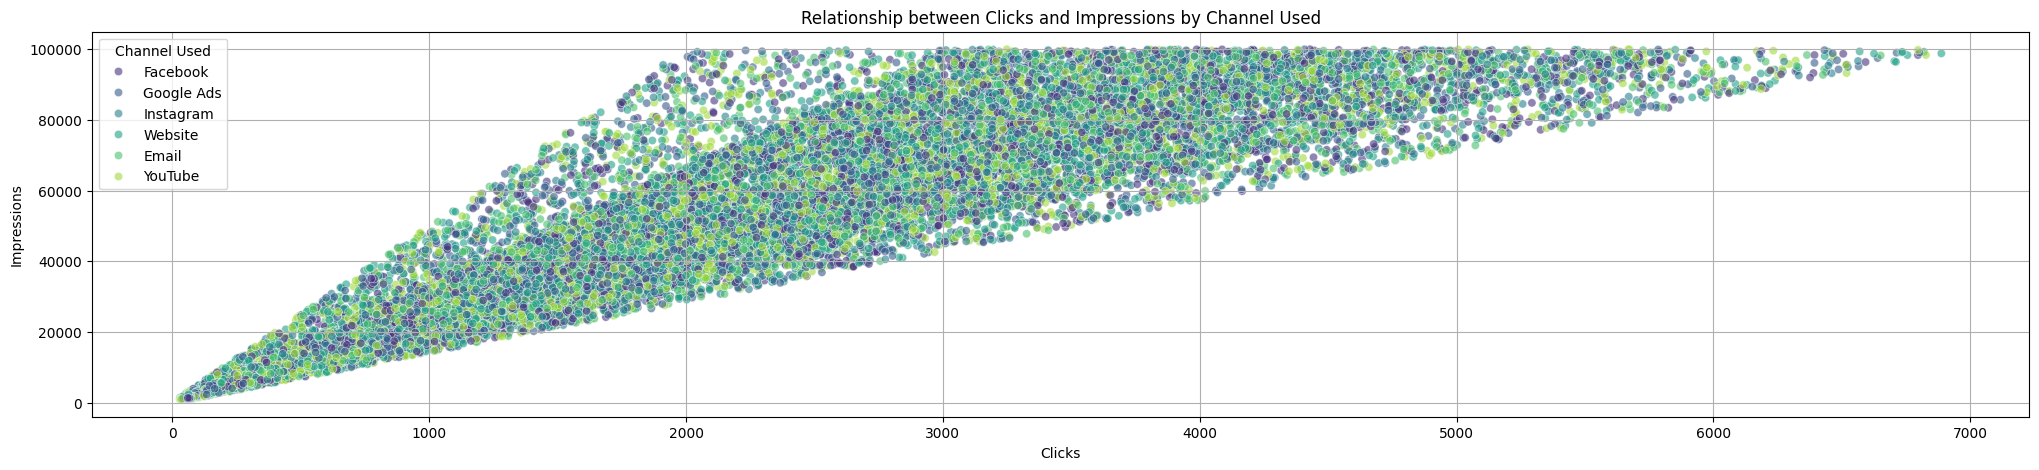

In [ ]:
# Scatter Plot: Relationship between Clicks and Impressions for each Channel Used
plt.figure(figsize=(25,5))
sns.scatterplot(data=data,x='Clicks',y='Impressions',hue='Channel_Used',alpha=0.6,palette='viridis')
plt.title('Relationship between Clicks and Impressions by Channel Used')
plt.xlabel('Clicks')
plt.ylabel('Impressions')
plt.grid(True)
plt.legend(title='Channel Used')
plt.show()

# Time-Based Analysis

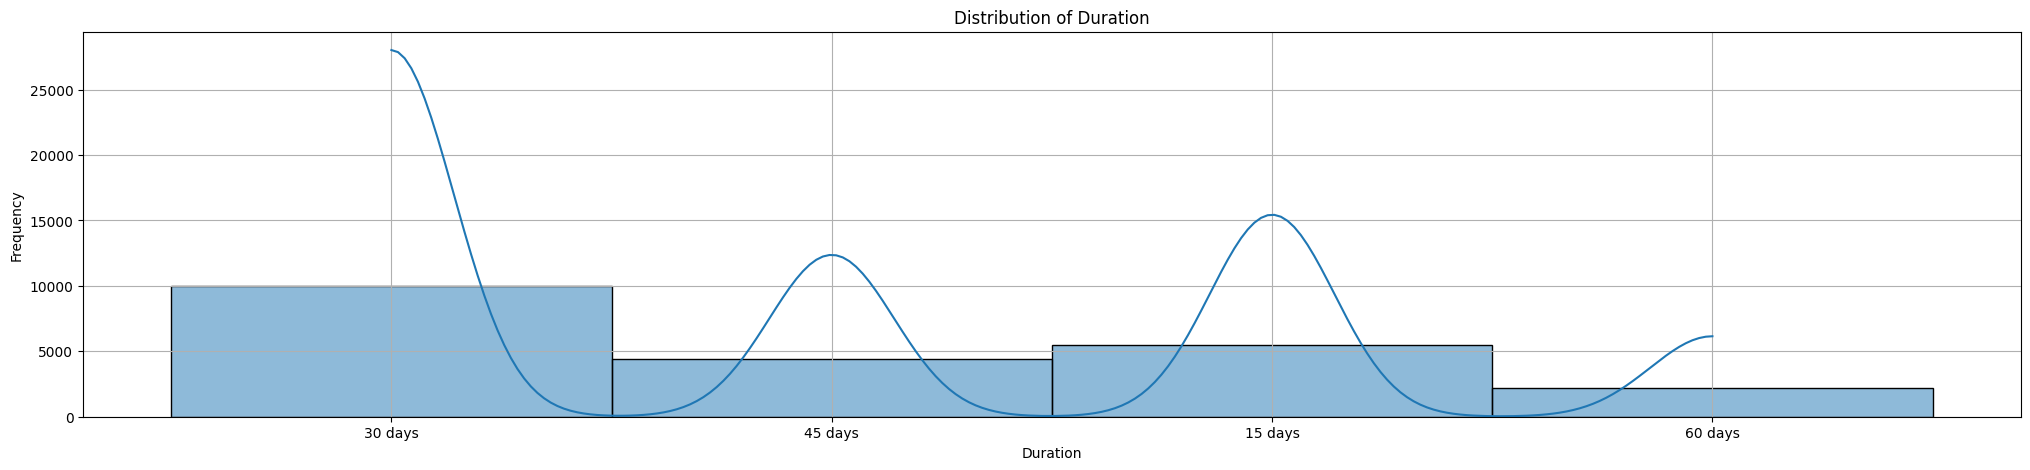

In [ ]:
# Histogram: Distribution of Duration
plt.figure(figsize=(25,5))
sns.histplot(data['Duration'],bins=30,kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

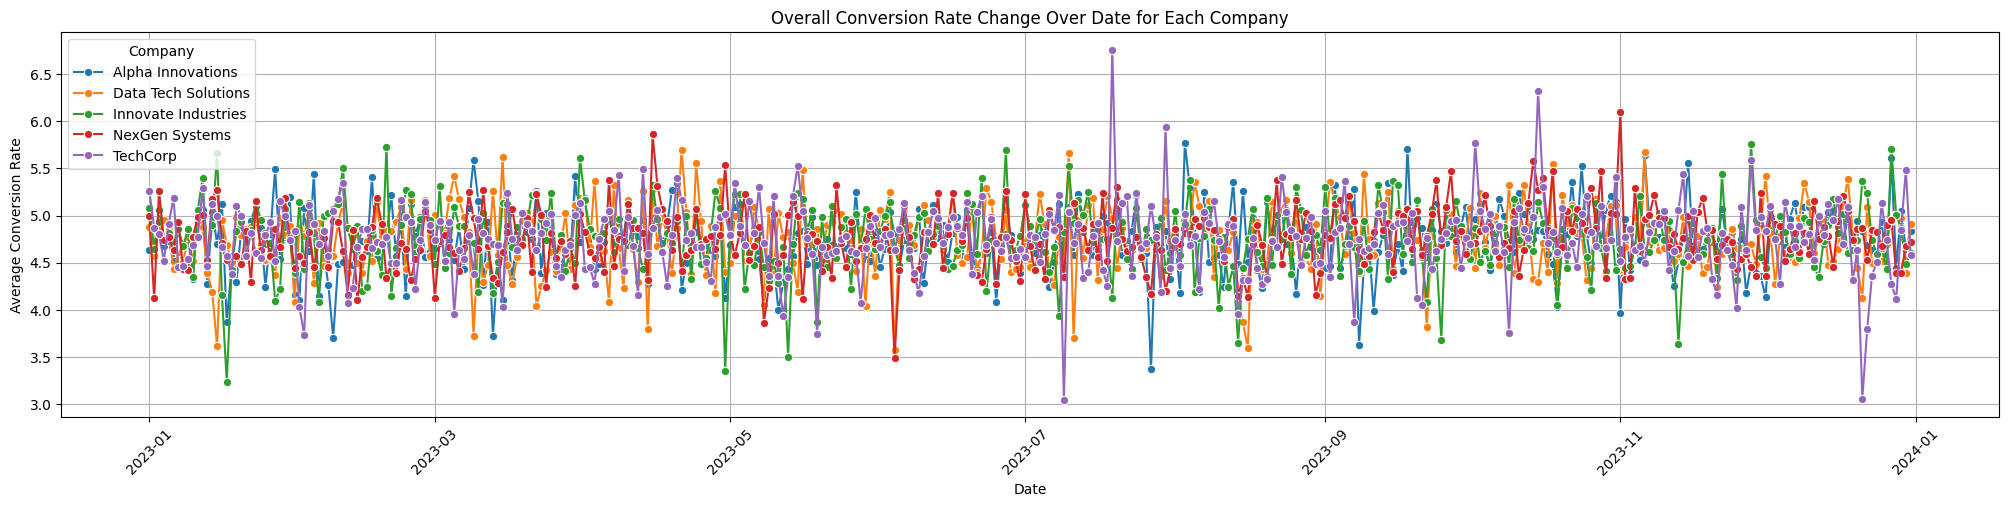

In [ ]:
# Ensure that Date is in datetime format Specify the correct format '%d-%m-%Y'
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

# Calculate average Conversion Rate by Date and Company
conversion_rate_over_time = data.groupby(['Date','Company'])['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(25,5))
sns.lineplot(data=conversion_rate_over_time,x='Date',y='Conversion_Rate',hue='Company',marker='o')
plt.title('Overall Conversion Rate Change Over Date for Each Company')
plt.xlabel('Date')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.grid(True)
plt.show()

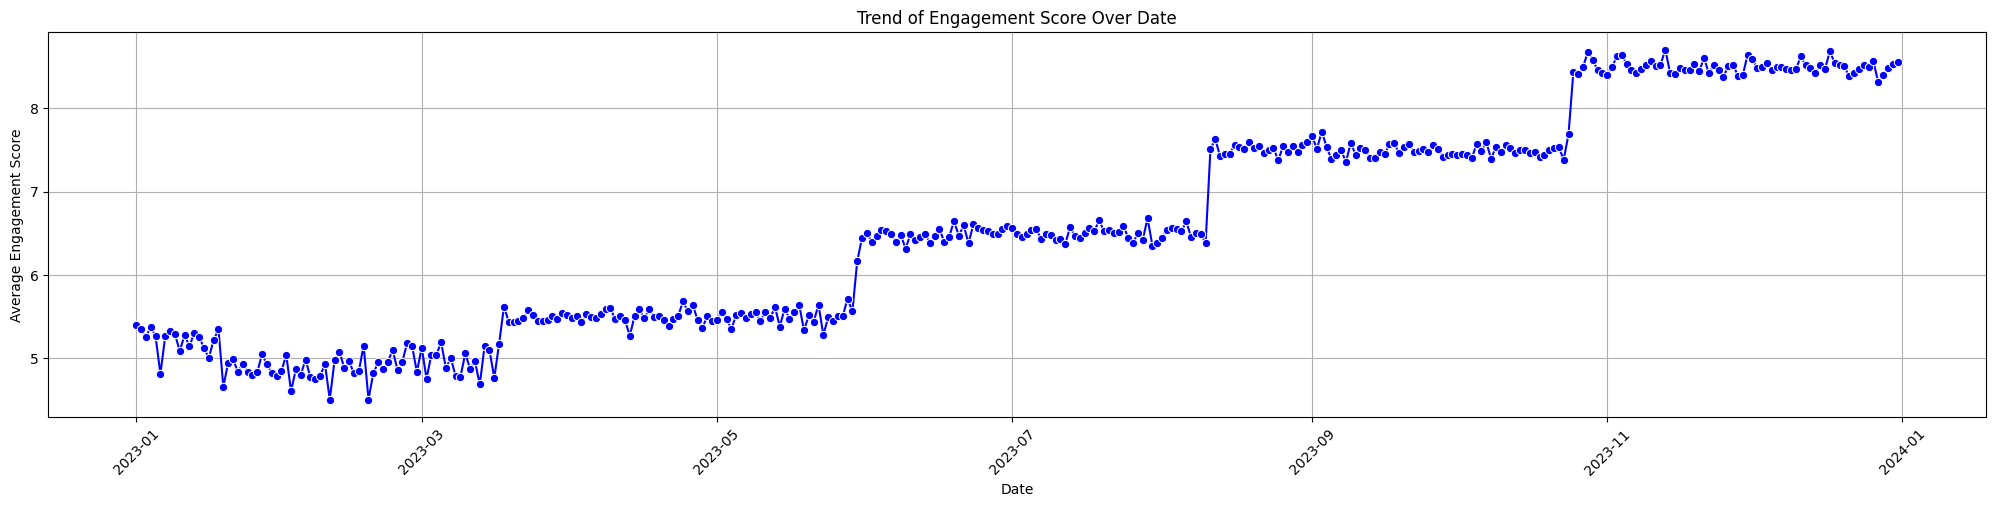

In [ ]:
# Calculate average Engagement Score by Date
engagement_score_over_time = data.groupby('Date')['Engagement_Score'].mean().reset_index()

plt.figure(figsize=(25,5))
sns.lineplot(data=engagement_score_over_time,x='Date',y='Engagement_Score',marker='o',color='blue')
plt.title('Trend of Engagement Score Over Date')
plt.xlabel('Date')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Geographic Analysis

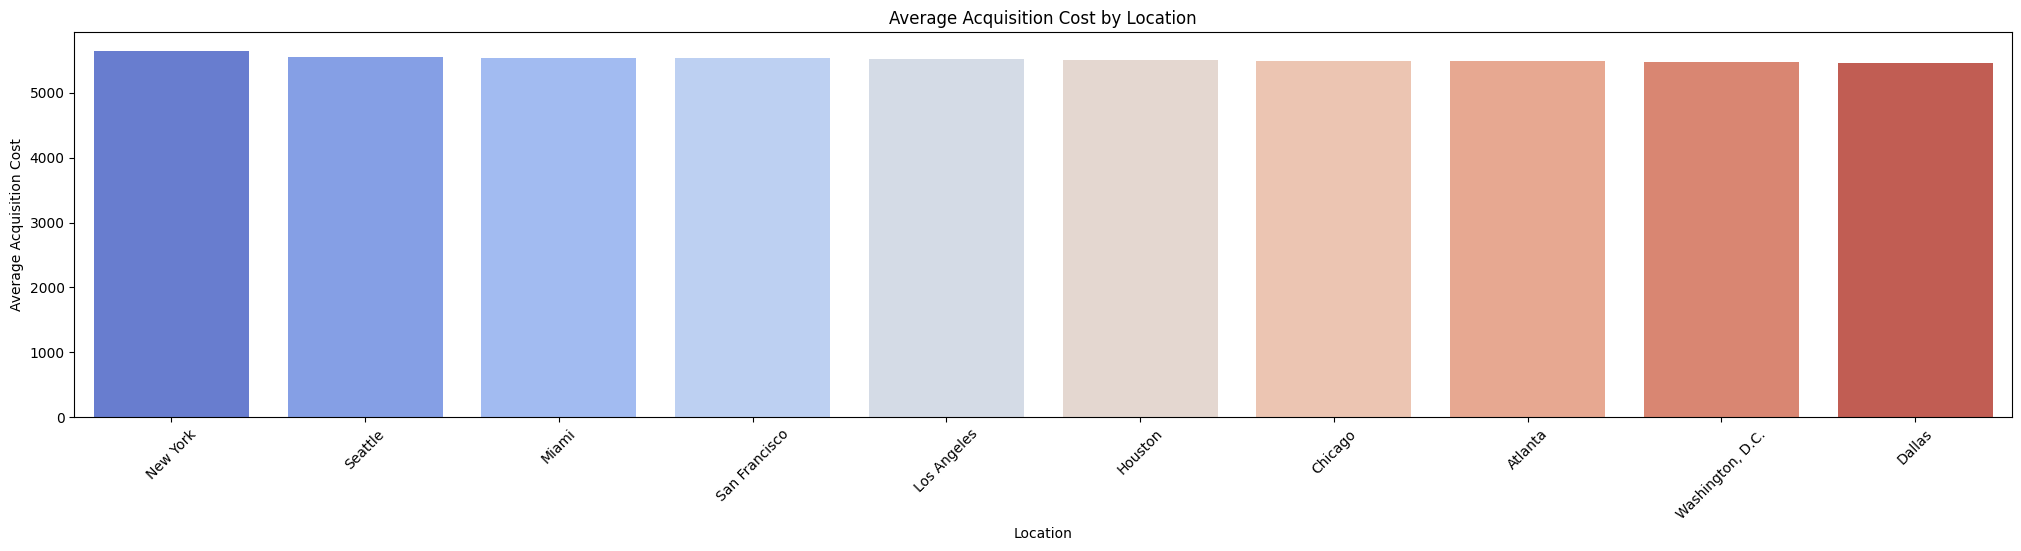

In [ ]:
# Bar Chart: Location with the highest Acquisition Cost
highest_acquisition_cost = data.groupby('Location')['Acquisition_Cost'].mean().reset_index()

plt.figure(figsize=(25,5))
sns.barplot(data=highest_acquisition_cost.sort_values(by='Acquisition_Cost',ascending=False),
            x='Location',y='Acquisition_Cost',palette='coolwarm')
plt.title('Average Acquisition Cost by Location')
plt.xlabel('Location')
plt.ylabel('Average Acquisition Cost')
plt.xticks(rotation=45)
plt.show()

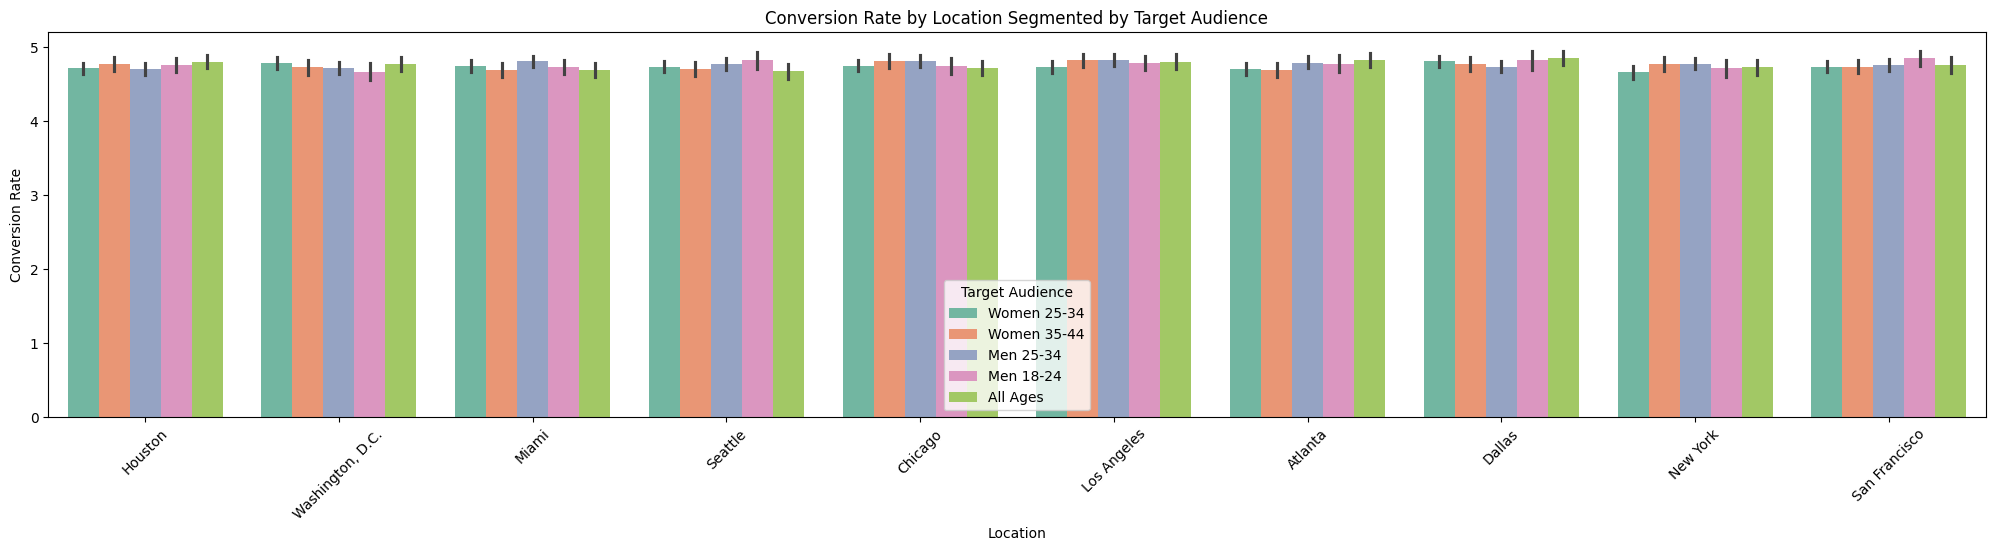

In [ ]:
# Bar Chart: Conversion Rate by Location categorized by Target Audience
plt.figure(figsize=(25,5))
sns.barplot(data=data,x='Location',y='Conversion_Rate',hue='Target_Audience',palette='Set2')
plt.title('Conversion Rate by Location Segmented by Target Audience')
plt.xlabel('Location')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Target Audience')
plt.show()

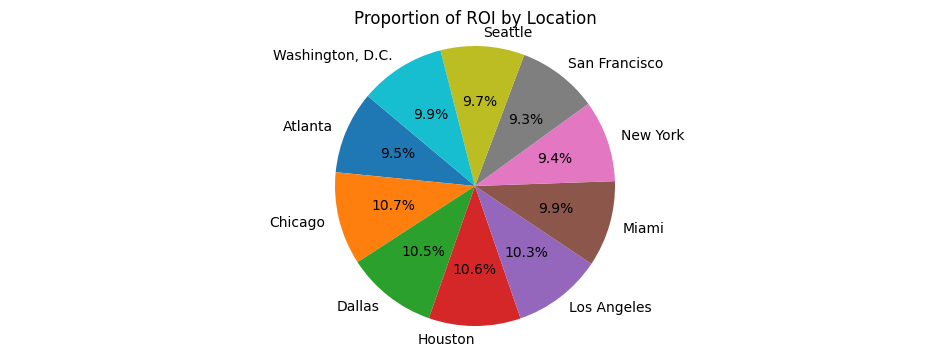

In [ ]:
# Pie Chart: Proportion of ROI by Location
roi_by_location = data.groupby('Location')['ROI'].sum().reset_index()

plt.figure(figsize=(12,4))
plt.pie(roi_by_location['ROI'],labels=roi_by_location['Location'],autopct='%1.1f%%',startangle=140)
plt.title('Proportion of ROI by Location')
plt.axis('equal')
plt.show()

In [68]:
# create README file

!touch README.md

In [72]:
## write readme file

%%writefile README.md
# Marketing Campaign Performance Analysis

This project analyzes the performance of marketing campaigns using a dataset containing various campaign metrics.

## Project Overview

The aim of this project is to gain insights into the effectiveness of different marketing campaigns by exploring various factors such as:

* **Campaign Performance:** Analyze acquisition cost, ROI, target audience, and conversion rates.
* **Channel Effectiveness:** Determine the most effective channels for driving engagement and conversions.
* **Customer Segmentation:** Understand the characteristics of different customer segments and their responses to campaigns.
* **Geographic Analysis:** Identify locations with the highest acquisition costs and conversion rates.
* **Time-Based Analysis:** Analyze trends in conversion rates, engagement scores over time.


## Data Exploration and Analysis

The project involves the following steps:

1. **Data Loading and Preprocessing:** Load the marketing campaign dataset and perform initial data cleaning and preparation.
2. **Exploratory Data Analysis (EDA):**
   * Analyze the distribution of various features.
   * Identify any outliers or missing values.
   * Analyze the relationship between different variables.
3. **Visualization:** Create various visualizations to understand the patterns and insights within the data, including:
    * Scatter plots
    * Bar charts
    * Box plots
    * Heatmaps
    * Line plots
    * Pie charts
4. **Insights and Conclusions:**  Derive actionable insights based on the analysis of the data and visualizations.



## Dependencies

* pandas
* numpy
* matplotlib
* seaborn
* sklearn


## Usage

The project can be run using any Python environment, such as Google Colab or Jupyter Notebook. To run the project, install the required dependencies, then run the Python script.


## Results

The project analyzes the dataset to gain insights and provide visual representations of the key findings. The script contains multiple plots and tables with a descriptive summary of the data.


## Future Work

* Build a predictive model to forecast campaign performance.
* Incorporate more advanced statistical techniques for deeper analysis.
* Develop interactive visualizations for more comprehensive exploration.


## Author

This project was developed by [Zahir Hussain ].

Overwriting README.md
